## TD

### AUX

In [ ]:
import numpy as np
from qu_spec_aux import QuSpecAux, QuSpecOptions
from laboneq.dsl.enums import AveragingMode, AcquisitionType

half_flux = 0.0876e-3
zero_flux = -0.025e-3

qu_spec = QuSpecAux()
options = QuSpecOptions()
options.count = 16000
options.averaging_mode = AveragingMode.CYCLIC
options.acquisition_type = AcquisitionType.SPECTROSCOPY

transition = "ge"

f_ro = qu_spec.qpu["q0"].parameters.readout_resonator_frequency

qu_spec.qpu.quantum_elements[0].update(
    **{
        "current": 0.694e-3,
        "spectroscopy_amplitude": 0.04,
        "spectroscopy_length": 5e-06,
        "drive_lo_frequency": 4.8e9,
        # Aux
        "aux_drive_amplitude": 0.0675, #0.008,
        "aux_drive_length": 1000e-9,
        "aux_lo_frequency": 7.2e9,
        "aux_frequency": f_ro,
        "aux_reset_delay_length": 1000e-9
    }
)

result = qu_spec.run(
    # [np.linspace(5.4e9, 5.8e9, 801)],
    [np.linspace(5.32e9, 5.38e9, 151)],
    # [qu_spec.sweep_around(f"resonance_frequency_{transition}", 20e6, n_points=251)],
    # sweeps={"readout_amplitude": np.linspace(0.005, 0.015, 11)},
    # sweeps={"index": np.arange(10)},
    # sweeps={"current": np.linspace(0.67e-3, 0.73e-3, 51)},
    # sweeps={"aux_drive_amplitude": np.linspace(0.065, 0.085, 11)},
    sweeps={"aux_reset_delay_length": np.linspace(0, 50e-6, 201)},
    # sweeps={"aux_drive_length": np.linspace(0.0, 1e-6, 6)},
    transition=transition,
    qu_ids=["q0"],
    options=options,
    update_params=True,
    relevant_params=[
        "readout_amplitude", "spectroscopy_amplitude",
        "aux_drive_amplitude", "aux_drive_length",
        "aux_frequency", "aux_reset_delay_length"
    ],
    # pulse_sheet=1.3e-6
)

2025-11-13 17:32:28,301 - INFO - Successfully connected to zi
2025-11-13 17:32:28,301 - DEBUG - Connecting to yoko0 (Yokogawa_GS200)
2025-11-13 17:32:28,339 - INFO - Successfully connected to yoko0
2025-11-13 17:32:28,724 - INFO - Setting up instruments
2025-11-13 17:32:28,724 - INFO - Setting up yoko0
2025-11-13 17:32:28,724 - INFO -  -> Voltage limit 1 V
2025-11-13 17:32:28,724 - INFO -  -> Current range 0.01 A
2025-11-13 17:32:28,724 - DEBUG - Disconnecting from yoko0 (Yokogawa_GS200)
2025-11-13 17:32:28,734 - INFO - Before exp
2025-11-13 17:32:28,758 - INFO - *** ZI estimated runtime: 10.45 s ***


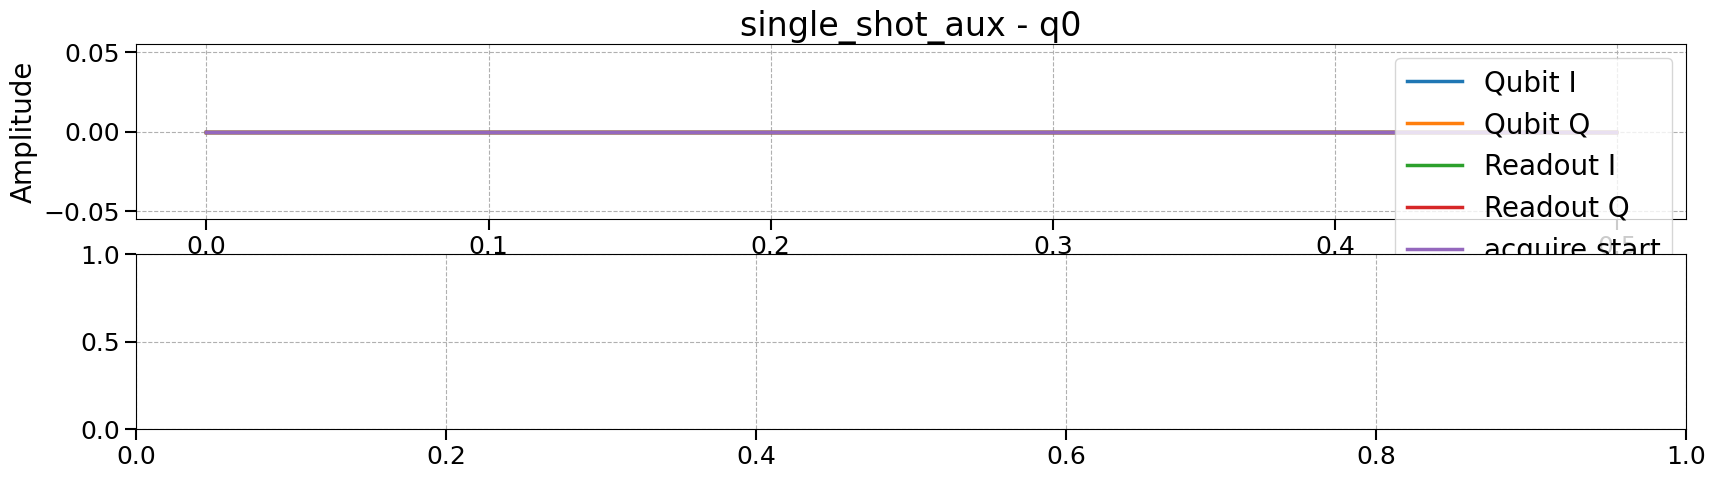

2025-11-13 17:32:29,058 - DEBUG - Connecting to yoko0 (Yokogawa_GS200)
2025-11-13 17:32:29,084 - DEBUG - Ramping current to 694 \mu A on yoko0
2025-11-13 17:32:29,092 - DEBUG - Disconnecting from yoko0 (Yokogawa_GS200)


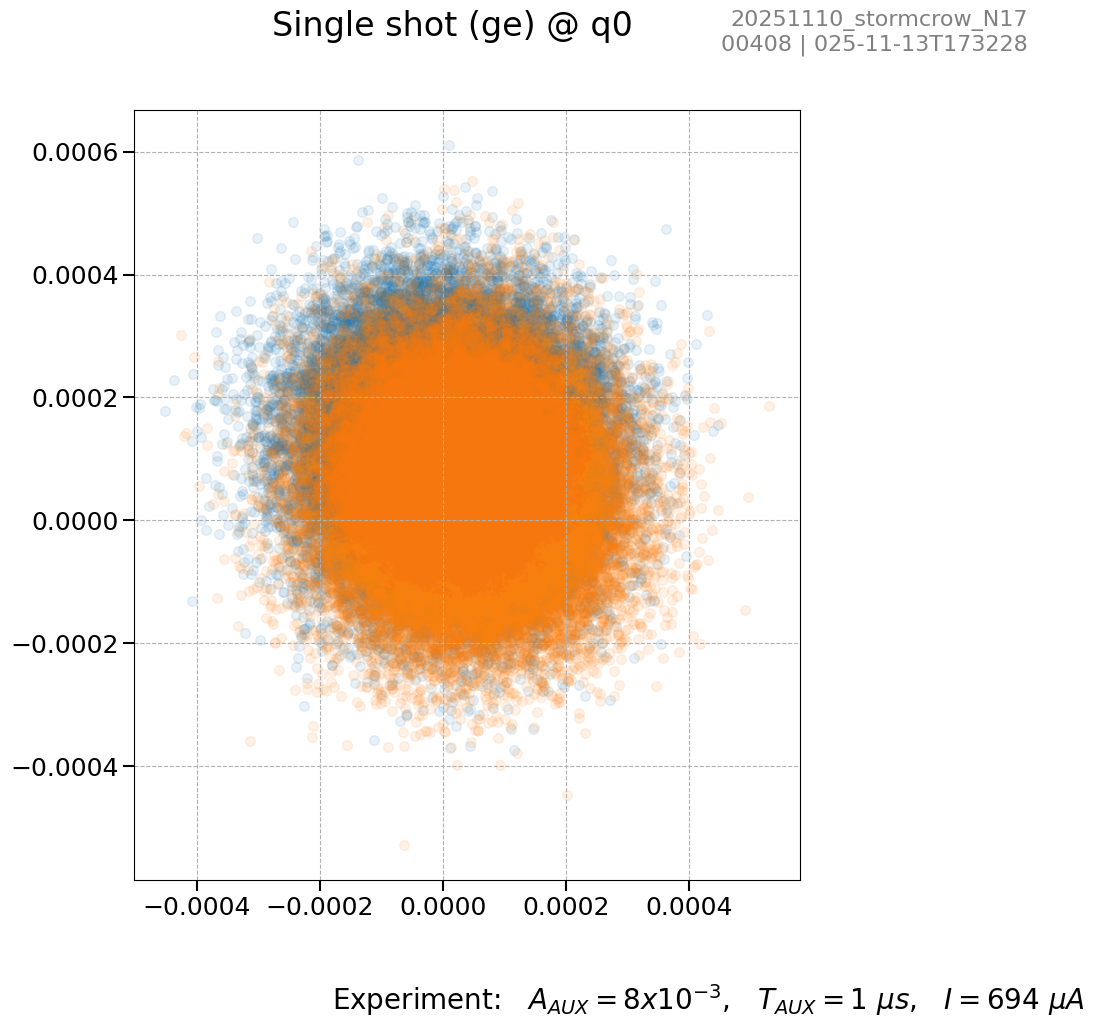

2025-11-13 17:32:42,259 - DEBUG - Disconnecting from yoko0 (Yokogawa_GS200)


In [18]:
import numpy as np
from sqil_experiments.measurements.single_shot_aux import SingleShotAux, SingleShotOptions
from laboneq.dsl.enums import AveragingMode, AcquisitionType

single_shot = SingleShotAux()
options = SingleShotOptions()
options.count = 50000
options.acquisition_type = AcquisitionType.SPECTROSCOPY

f_ro = single_shot.qpu["q0"].parameters.readout_resonator_frequency

single_shot.qpu.quantum_elements[0].update(
    **{
        # "current": 0e-6,
        # Aux
        "aux_drive_amplitude": 0.0675, #0.008,
        "aux_drive_length": 1000e-9,
        "aux_lo_frequency": 7.2e9,
        "aux_frequency": f_ro,
        "aux_reset_delay_length": 1000e-9
    }
)

result = single_shot.run(
    ['g', 'e'],
    qu_ids=["q0"],
    options=options,
    update_params=True,
    relevant_params=["aux_drive_amplitude", "aux_drive_length"],
    pulse_sheet=0.5e-6,
)

### Resonator spectroscopy

2025-11-13 20:44:00,652 - INFO - Successfully connected to zi
2025-11-13 20:44:00,653 - DEBUG - Connecting to yoko0 (Yokogawa_GS200)
2025-11-13 20:44:00,665 - INFO - Successfully connected to yoko0
2025-11-13 20:44:00,911 - INFO - Setting up instruments
2025-11-13 20:44:00,911 - INFO - Setting up yoko0
2025-11-13 20:44:00,913 - INFO -  -> Voltage limit 1 V
2025-11-13 20:44:00,913 - INFO -  -> Current range 0.01 A
2025-11-13 20:44:00,913 - DEBUG - Disconnecting from yoko0 (Yokogawa_GS200)
2025-11-13 20:44:00,913 - INFO - Before exp
2025-11-13 20:44:00,979 - INFO - *** ZI estimated runtime: 0.50 s ***
2025-11-13 20:44:00,980 - DEBUG - Connecting to yoko0 (Yokogawa_GS200)
2025-11-13 20:44:00,996 - DEBUG - Ramping current to 700 \mu A on yoko0
2025-11-13 20:44:01,031 - DEBUG - Disconnecting from yoko0 (Yokogawa_GS200)


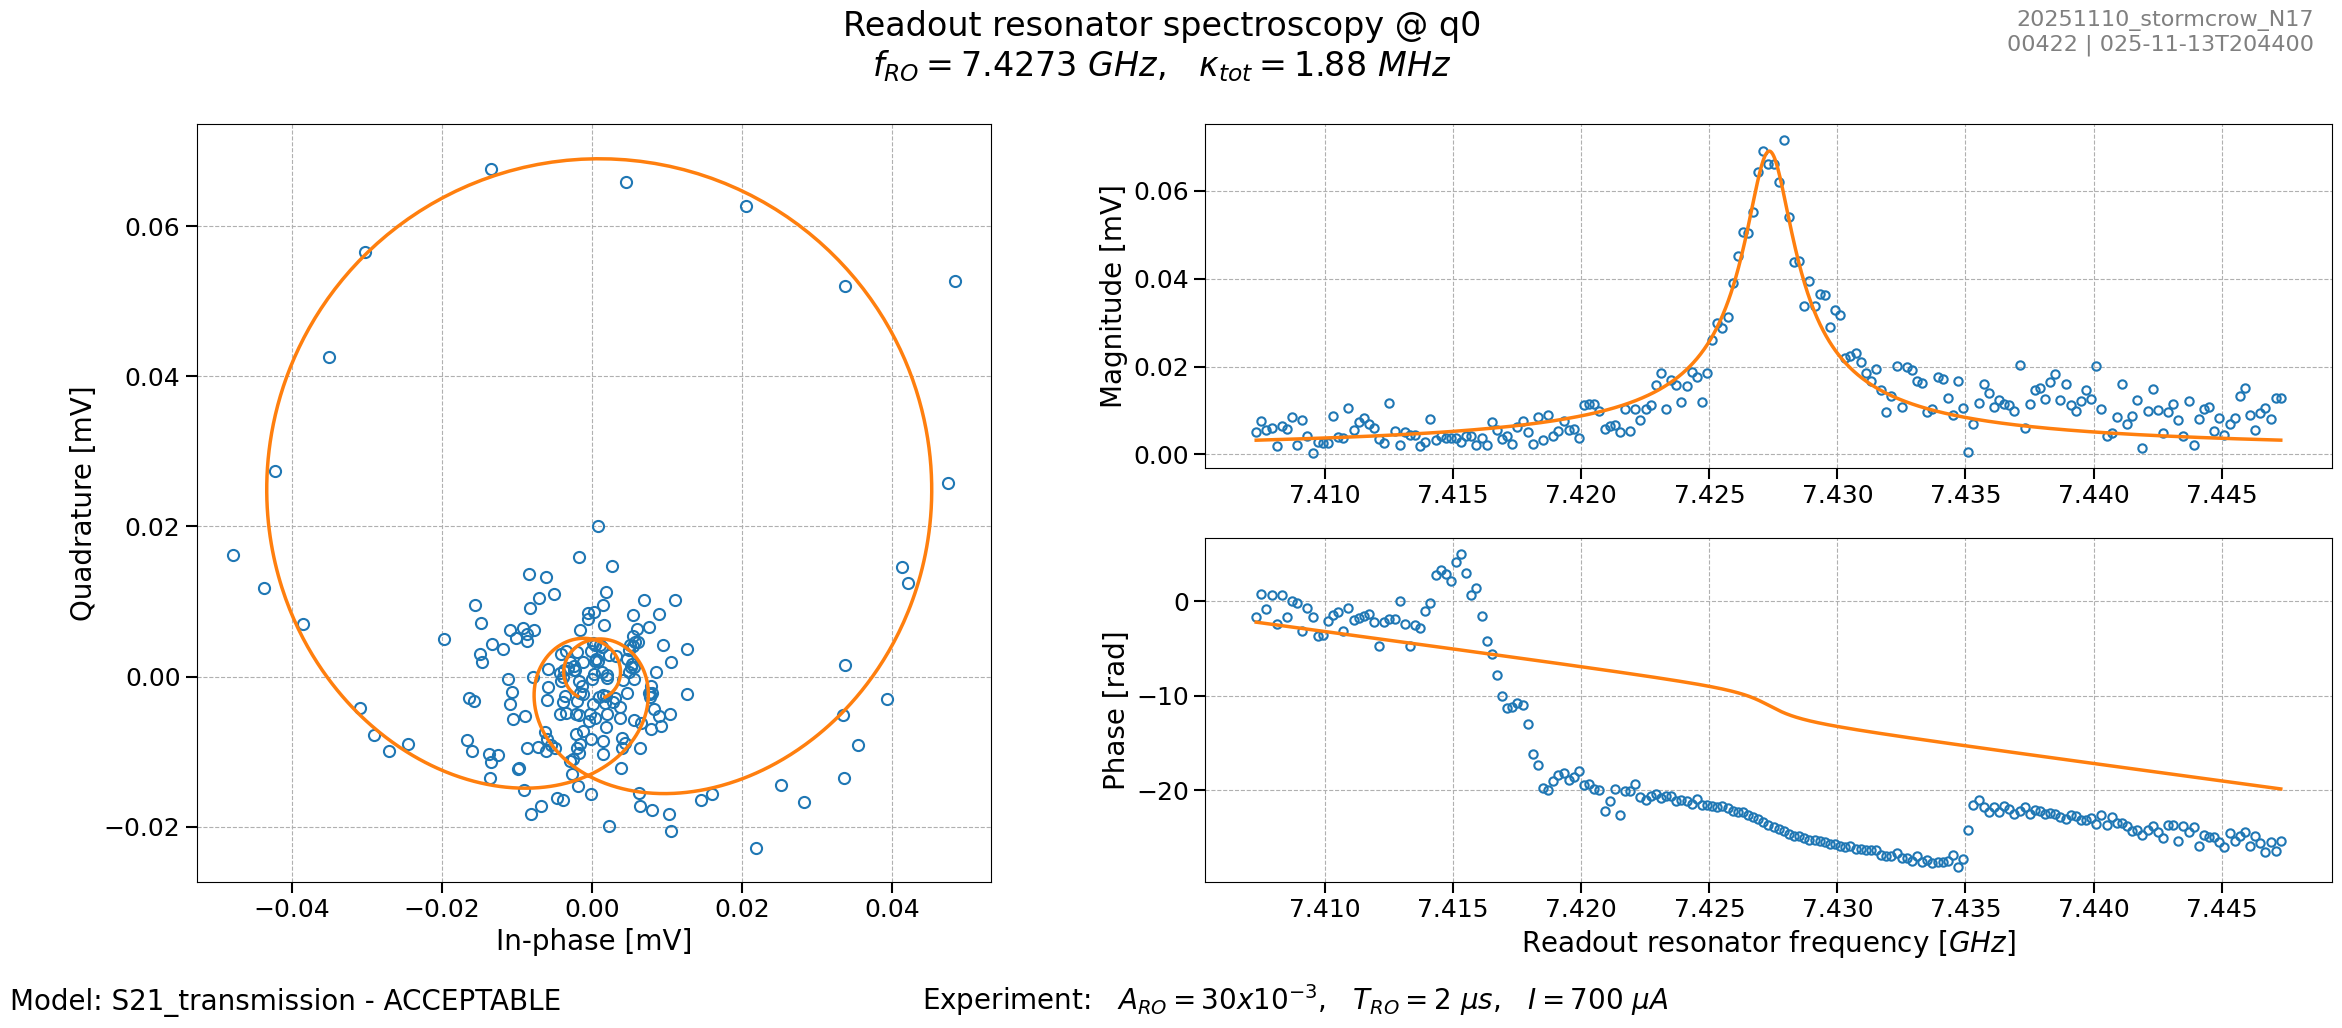

2025-11-13 20:44:02,657 - DEBUG - Disconnecting from yoko0 (Yokogawa_GS200)


In [44]:
import numpy as np
from rr_spec import RRSpec, ResonatorSpectroscopyExperimentOptions

rr_spec = RRSpec()
options = ResonatorSpectroscopyExperimentOptions()
options.count = 800


rr_spec.qpu.quantum_elements[0].update(**{
    "current": 0.7e-3,
    "readout_configuration": "transmission",
    "readout_amplitude": 0.03
})


result = rr_spec.run(
    # [np.linspace(7e9, 8e9, 2001)],
    [rr_spec.sweep_around("readout_resonator_frequency", 20e6, n_points=201)],
    # sweeps={"readout_amplitude": np.linspace(0.03, 0.15, 51)},
    # sweeps={"readout_amplitude": np.linspace(0.003, 0.02, 41)},
    # sweeps={"index": np.arange(200)},
    # sweeps={"current": np.linspace(-0.1e-3, 0.8e-3, 101)},
    qu_ids=["q0"],
    options=options,
    update_params=True,
)

### Qubit specroscopy

2025-11-13 14:55:56,121 - INFO - Successfully connected to zi
2025-11-13 14:55:56,122 - DEBUG - Connecting to yoko0 (Yokogawa_GS200)
2025-11-13 14:55:56,151 - INFO - Successfully connected to yoko0
2025-11-13 14:55:56,483 - INFO - Setting up instruments
2025-11-13 14:55:56,483 - INFO - Setting up yoko0
2025-11-13 14:55:56,483 - INFO -  -> Voltage limit 1 V
2025-11-13 14:55:56,492 - INFO -  -> Current range 0.01 A
2025-11-13 14:55:56,492 - DEBUG - Disconnecting from yoko0 (Yokogawa_GS200)
2025-11-13 14:55:56,497 - INFO - Before exp
2025-11-13 14:55:56,550 - INFO - *** ZI estimated runtime: 15.66 s ***
2025-11-13 14:55:56,550 - DEBUG - Connecting to yoko0 (Yokogawa_GS200)
2025-11-13 14:55:56,599 - DEBUG - Ramping current to 694 \mu A on yoko0
2025-11-13 14:55:56,609 - DEBUG - Disconnecting from yoko0 (Yokogawa_GS200)


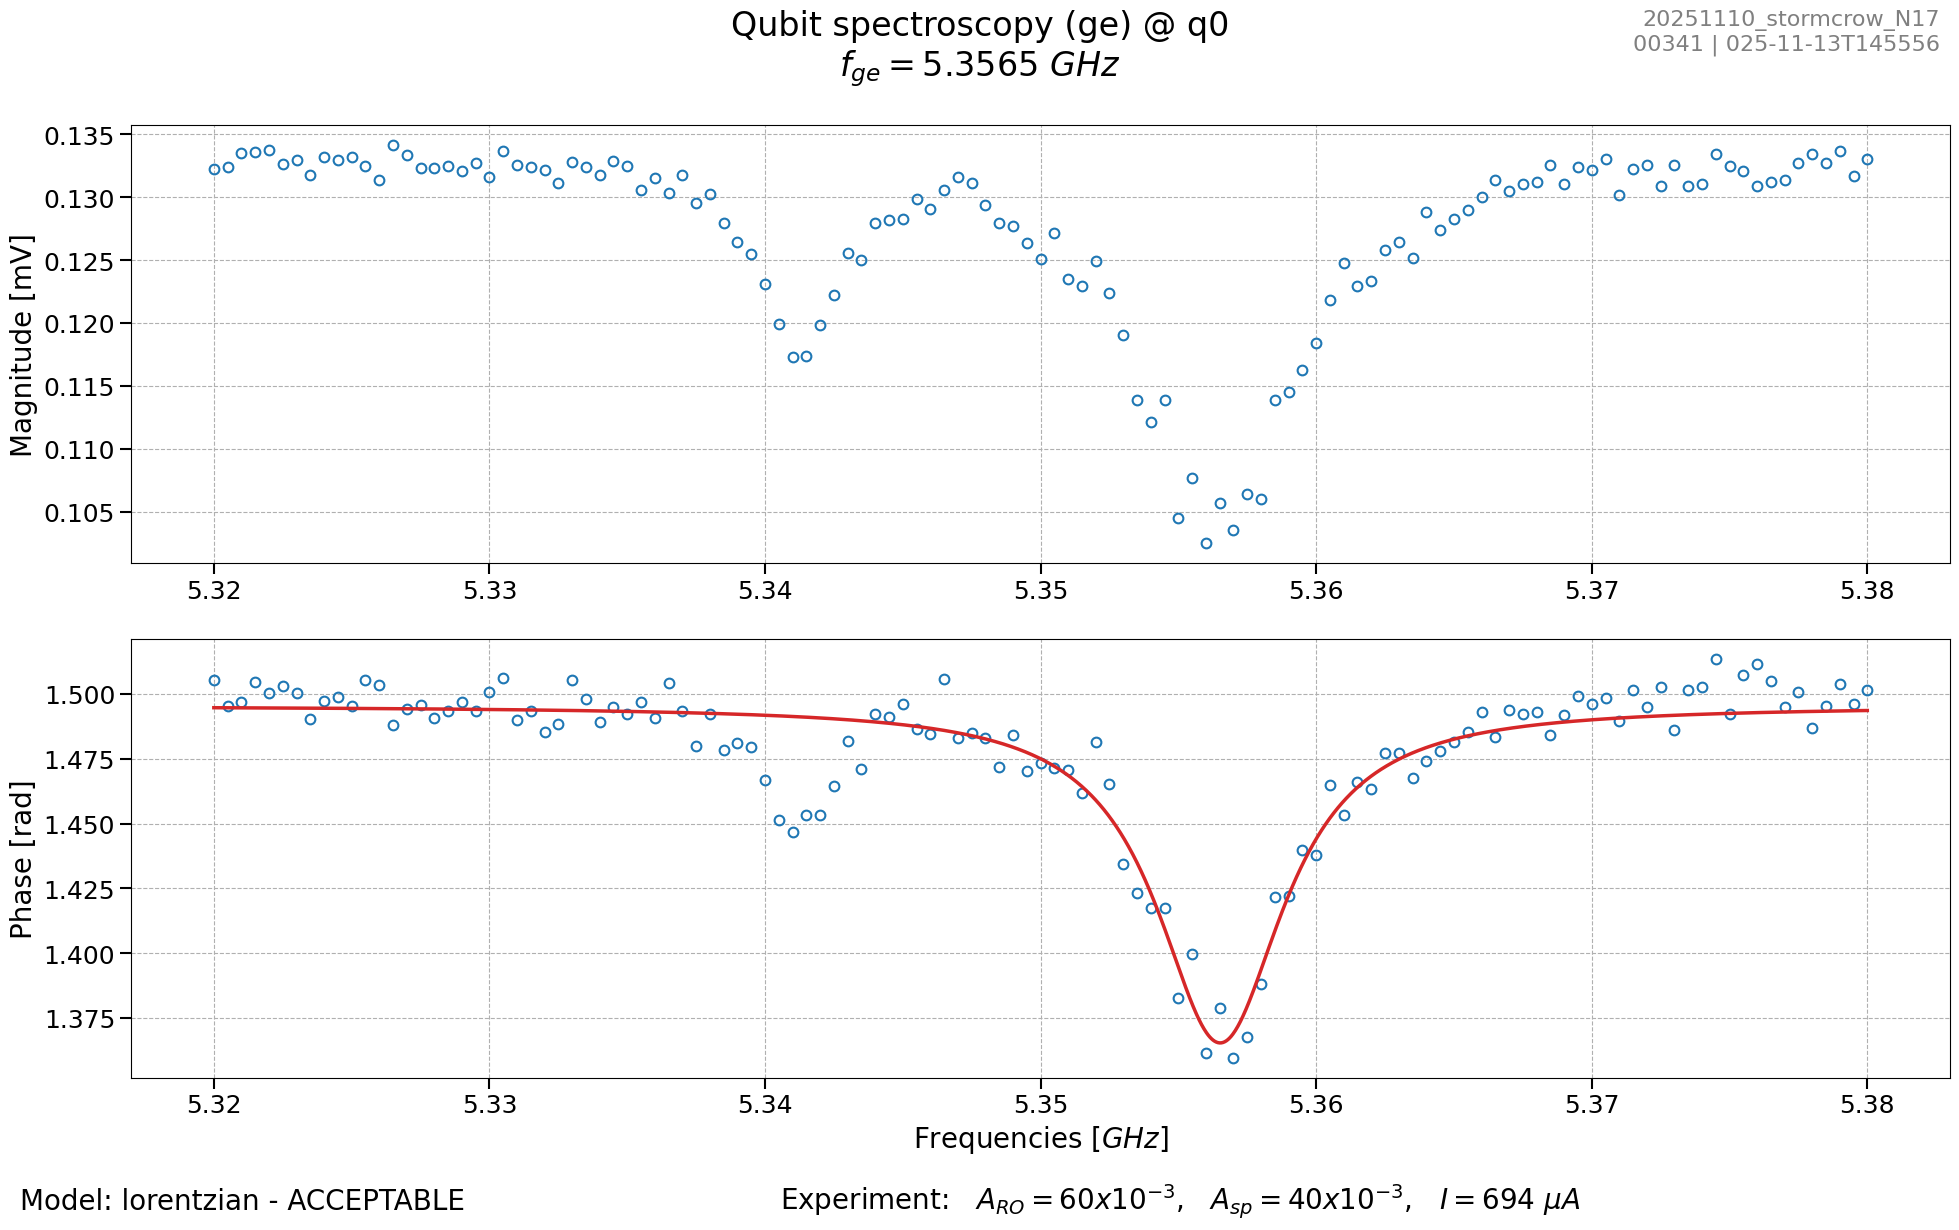

2025-11-13 14:56:13,247 - DEBUG - Disconnecting from yoko0 (Yokogawa_GS200)


In [30]:
import numpy as np
from qu_spec import QuSpec, QuSpecOptions
from laboneq.dsl.enums import AveragingMode, AcquisitionType

half_flux = 0.0876e-3
zero_flux = -0.025e-3

qu_spec = QuSpec()
options = QuSpecOptions()
options.count = 16000
options.averaging_mode = AveragingMode.CYCLIC
options.acquisition_type = AcquisitionType.SPECTROSCOPY

transition = "ge"

qu_spec.qpu.quantum_elements[0].update(
    **{
        "current": 0.694e-3,
        "spectroscopy_amplitude": 0.04,
        "spectroscopy_length": 5e-06,
        "drive_lo_frequency": 4.8e9,
    }
)

result = qu_spec.run(
    [np.linspace(5.32e9, 5.38e9, 121)],
    # [np.linspace(3.0e9, 3.6e9, 1601)],
    # [qu_spec.sweep_around(f"resonance_frequency_{transition}", 20e6, n_points=251)],
    # sweeps={"readout_amplitude": np.linspace(0.005, 0.05, 31)},
    # sweeps={"index": np.arange(10)},
    # sweeps={"current": np.linspace(0.65e-3, 0.75e-3, 11)},
    transition=transition,
    qu_ids=["q0"],
    options=options,
    update_params=True,
    relevant_params=["readout_amplitude", "spectroscopy_amplitude"],
    # pulse_sheet=0.3e-6
)

### Time Rabi

2025-11-13 17:30:28,494 - INFO - Successfully connected to zi
2025-11-13 17:30:28,494 - DEBUG - Connecting to yoko0 (Yokogawa_GS200)
2025-11-13 17:30:28,528 - INFO - Successfully connected to yoko0
2025-11-13 17:30:28,859 - INFO - Setting up instruments
2025-11-13 17:30:28,859 - INFO - Setting up yoko0
2025-11-13 17:30:28,859 - INFO -  -> Voltage limit 1 V
2025-11-13 17:30:28,859 - INFO -  -> Current range 0.01 A
2025-11-13 17:30:28,859 - DEBUG - Disconnecting from yoko0 (Yokogawa_GS200)
2025-11-13 17:30:28,859 - INFO - Before exp
2025-11-13 17:30:28,916 - INFO - *** ZI estimated runtime: 45.07 s ***
2025-11-13 17:30:28,917 - DEBUG - Connecting to yoko0 (Yokogawa_GS200)
2025-11-13 17:30:28,963 - DEBUG - Ramping current to 694 \mu A on yoko0
2025-11-13 17:30:28,973 - DEBUG - Disconnecting from yoko0 (Yokogawa_GS200)


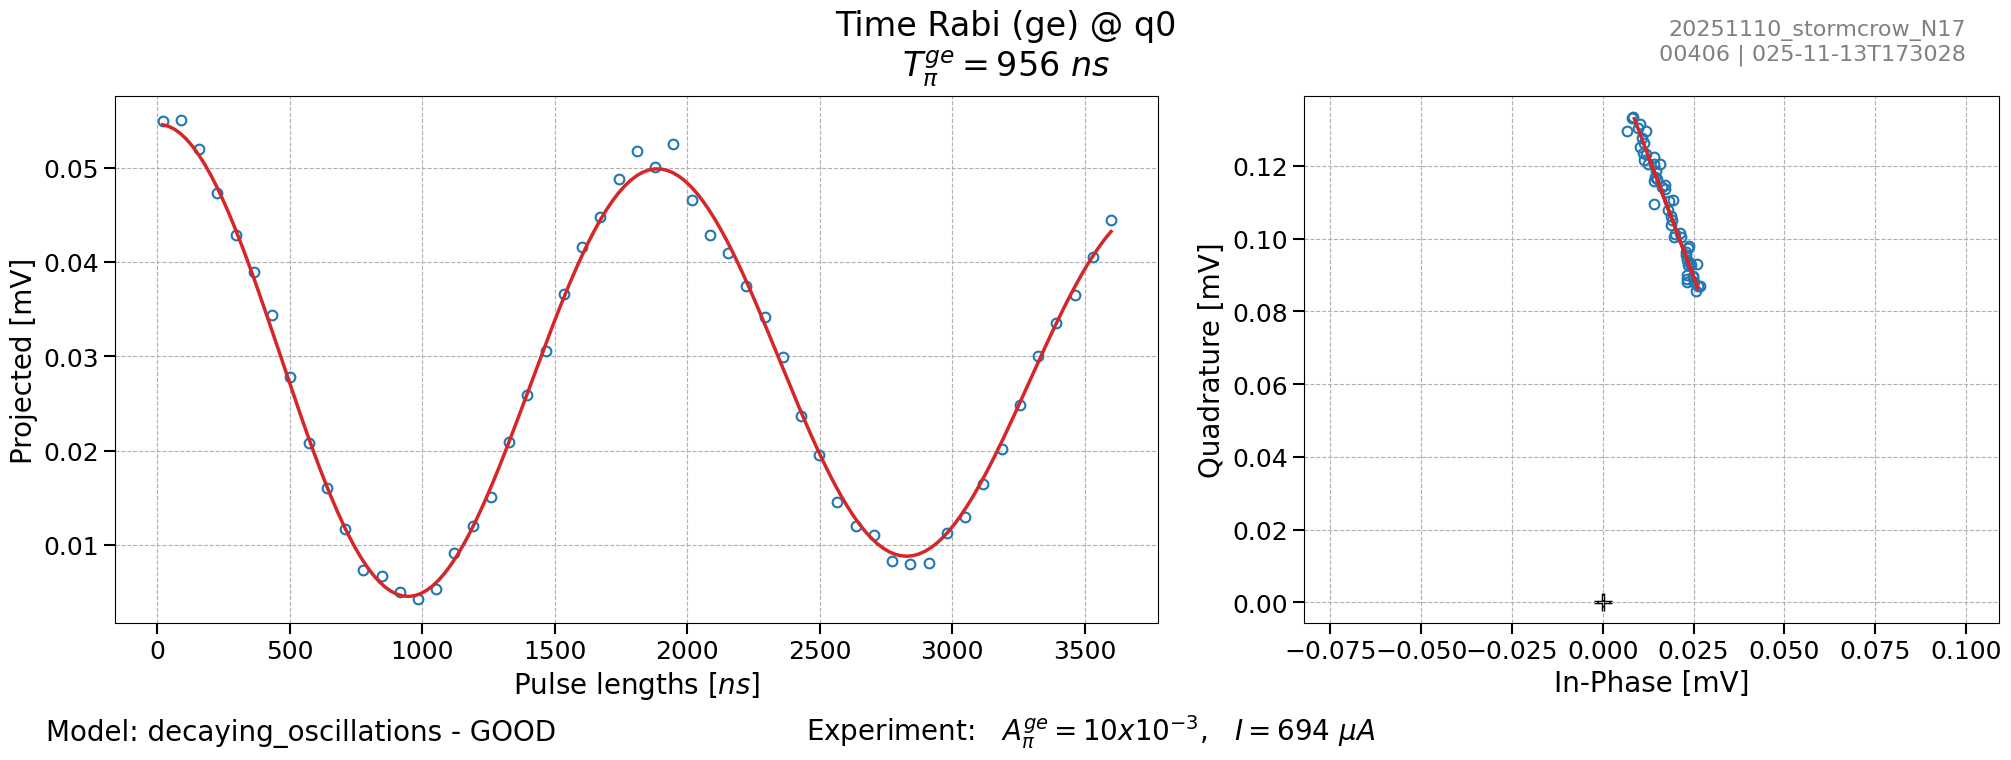

2025-11-13 17:31:15,051 - DEBUG - Disconnecting from yoko0 (Yokogawa_GS200)


In [16]:
import numpy as np
from time_rabi import TimeRabi, TimeRabiOptions
from laboneq.dsl.enums import AcquisitionType, AveragingMode

time_rabi = TimeRabi()
options = TimeRabiOptions()
options.count = 2**12
options.acquisition_type = AcquisitionType.SPECTROSCOPY

time_rabi.qpu.quantum_elements[0].update(
    **{
        # "current": -0.025e-3,
        "ge_drive_amplitude_pi": 0.01,
        "ge_drive_amplitude_pi2": 0.04,
        "reset_delay_length": 100e-6,
        "ef_drive_amplitude_pi": 0.08,
    }
)

result = time_rabi.run(
    [np.linspace(20e-9, 3600e-9, 53)],
    # sweeps={"readout_range_out": [-30, -20], "readout_amplitude": [0.5, 1]},
    # sweeps={"resonance_frequency_ge": np.linspace(qu_freq-5e6, qu_freq+5e6, 11)},
    transition="ge",
    qu_ids=["q0"],
    options=options,
    relevant_params=["ge_drive_amplitude_pi"],
    # pulse_sheet=150e-9
)

### Qubit temperature

In [ ]:
import numpy as np
from qubit_temperature import QubitTemperature, QubitTemperatureOptions
from laboneq.dsl.enums import AcquisitionType, AveragingMode

qubit_temp = QubitTemperature()
options = QubitTemperatureOptions()
options.count = 2**15
options.acquisition_type = AcquisitionType.SPECTROSCOPY

result = qubit_temp.run(
    [np.linspace(1e-6, 0.8, 2)],
    sweeps={"index": np.arange(100)},
    qu_ids=["q0"],
    options=options,
)

2025-09-17 12:41:05,919 - INFO - Successfully connected to zi


[2025.09.17 12:41:05.925] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\sqil_experiments\measurements\laboneq_output\log
[2025.09.17 12:41:05.927] INFO    VERSION: laboneq 2.57.0
[2025.09.17 12:41:05.928] INFO    Connecting to data server at localhost:8004
[2025.09.17 12:41:05.932] INFO    Connected to Zurich Instruments LabOne Data Server version 25.07.0.507 at localhost:8004
[2025.09.17 12:41:05.938] INFO    Configuring the device setup
[2025.09.17 12:41:05.945] INFO    The device setup is configured


2025-09-17 12:41:05,956 - INFO - Setting up instruments
2025-09-17 12:41:05,958 - INFO - Before exp


[2025.09.17 12:41:05.965] INFO    Resolved modulation type of oscillator 'q0_readout_acquire_osc' on signal 'q0/acquire' to HARDWARE
[2025.09.17 12:41:05.969] INFO    Resolved modulation type of oscillator 'q0_drive_ge_osc' on signal 'q0/drive' to HARDWARE
[2025.09.17 12:41:05.969] INFO    Resolved modulation type of oscillator 'q0_drive_ef_osc' on signal 'q0/drive_ef' to HARDWARE
[2025.09.17 12:41:05.969] INFO    Starting LabOne Q Compiler run...
[2025.09.17 12:41:05.974] INFO    Schedule completed. [0.001 s]
[2025.09.17 12:41:05.978] INFO    Code generation completed for all AWGs. [0.002 s]
[2025.09.17 12:41:05.978] INFO    Completed compilation step 1 of 1. [0.005 s]
[2025.09.17 12:41:05.980] INFO     ──────────────────────────────────────────────────────────────── 
[2025.09.17 12:41:05.980] INFO      Device       AWG   SeqC LOC   CT entries   Waveforms   Samples  
[2025.09.17 12:41:05.980] INFO     ──────────────────────────────────────────────────────────────── 
[2025.09.17 12:41:

2025-09-17 13:42:07,361 - ERROR - Error while analyzing the data cannot access local variable 'T_qu' where it is not associated with a value
Traceback (most recent call last):
  File "c:\Users\sqil\AppData\Local\pypoetry\Cache\virtualenvs\sqil-experiments-gl8RHkKX-py3.12\Lib\site-packages\sqil_core\experiment\_experiment.py", line 294, in run_with_plottr
    anal_res = self.analyze(storage_path_local, *args, **run_kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sqil\Desktop\code\sqil-experiments\sqil_experiments\measurements\qubit_temperature.py", line 98, in analyze
    return analyze_qubit_temperature(path=path, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sqil\AppData\Local\pypoetry\Cache\virtualenvs\sqil-experiments-gl8RHkKX-py3.12\Lib\site-packages\sqil_core\experiment\_analysis.py", line 225, in wrapper
    anal_res_qu = single_qubit_handler(*args, **fun_kwargs)
                  ^^^^^^^^^^^^^^^

### T1

In [1]:
from sqil_experiments.measurements.T1 import T1
import numpy as np
from laboneq_applications.experiments.options import (
    TuneupExperimentOptions,
)
from laboneq.dsl.enums import AcquisitionType

T1_value = 50e-6

time = np.hstack(
    [
        np.linspace(0, T1_value, 11),
        np.logspace(np.log(T1_value * 1.1), np.log(5 * T1_value), 11, base=np.e),
    ]
)

options =TuneupExperimentOptions()
options.acquisition_type = AcquisitionType.SPECTROSCOPY
options.count = 2**12


T1_exp = T1()
result = T1_exp.run(
    [time],
    # sweeps={"index": np.arange(5)},
    options=options,
    update_params=True,
)

2025-11-12 14:28:44,781 - INFO - Successfully connected to zi
2025-11-12 14:28:44,781 - DEBUG - Connecting to yoko0 (Yokogawa_GS200)
2025-11-12 14:28:45,196 - INFO - Successfully connected to yoko0
2025-11-12 14:28:46,096 - INFO - Setting up instruments
2025-11-12 14:28:46,097 - INFO - Setting up yoko0
2025-11-12 14:28:46,098 - INFO -  -> Voltage limit 1 V
2025-11-12 14:28:46,098 - INFO -  -> Current range 0.01 A
2025-11-12 14:28:46,098 - DEBUG - Disconnecting from yoko0 (Yokogawa_GS200)
2025-11-12 14:28:46,098 - INFO - Before exp
2025-11-12 14:28:46,141 - INFO - *** ZI estimated runtime: 13.84 s ***
2025-11-12 14:28:46,141 - DEBUG - Connecting to yoko0 (Yokogawa_GS200)
2025-11-12 14:28:46,180 - DEBUG - Ramping current to 0 A on yoko0
2025-11-12 14:28:46,190 - DEBUG - Disconnecting from yoko0 (Yokogawa_GS200)
2025-11-12 14:28:51,280 - DEBUG - Disconnecting from yoko0 (Yokogawa_GS200)


CancelledError: 

### T2 echo

2025-11-12 09:19:29,020 - INFO - Successfully connected to zi
2025-11-12 09:19:29,020 - DEBUG - Connecting to yoko0 (Yokogawa_GS200)
2025-11-12 09:19:29,038 - INFO - Successfully connected to yoko0
2025-11-12 09:19:29,379 - INFO - Setting up instruments
2025-11-12 09:19:29,379 - INFO - Setting up yoko0
2025-11-12 09:19:29,379 - INFO -  -> Voltage limit 1 V
2025-11-12 09:19:29,379 - INFO -  -> Current range 0.01 A
2025-11-12 09:19:29,379 - DEBUG - Disconnecting from yoko0 (Yokogawa_GS200)
2025-11-12 09:19:29,389 - INFO - Before exp
2025-11-12 09:19:29,434 - INFO - *** ZI estimated runtime: 4.88 s ***
2025-11-12 09:19:29,434 - DEBUG - Connecting to yoko0 (Yokogawa_GS200)
2025-11-12 09:19:29,483 - DEBUG - Ramping current to 0 A on yoko0
2025-11-12 09:19:29,494 - DEBUG - Disconnecting from yoko0 (Yokogawa_GS200)


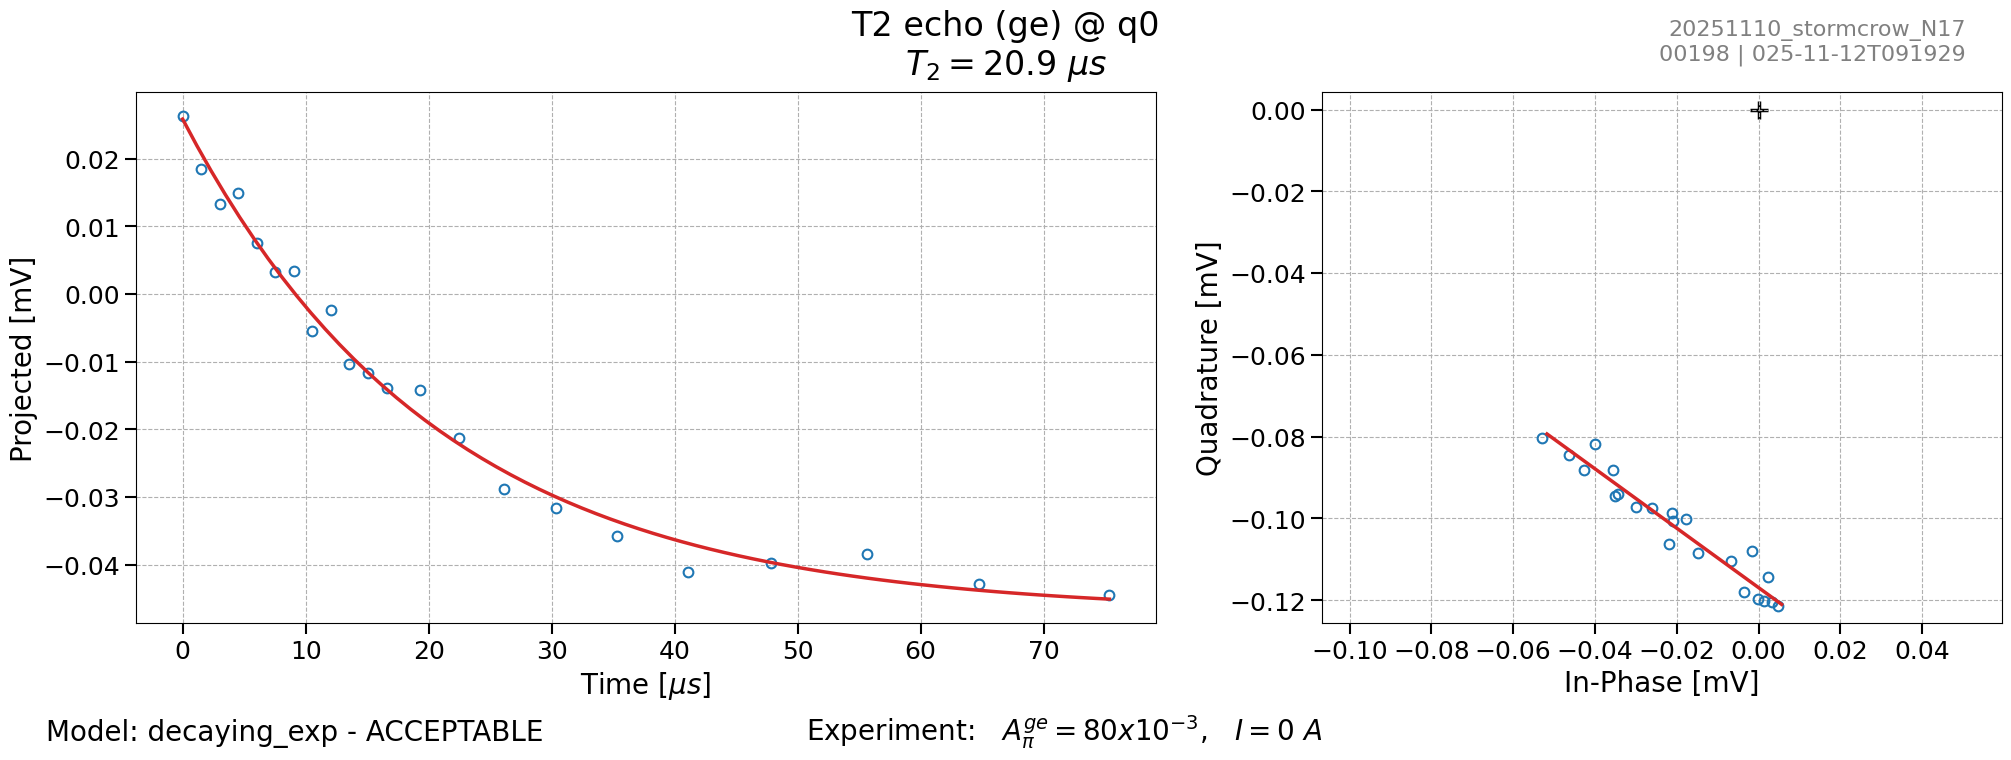

2025-11-12 09:19:35,249 - DEBUG - Disconnecting from yoko0 (Yokogawa_GS200)


In [39]:
from sqil_experiments.measurements.T2_echo import T2Echo, EchoExperimentOptions
import numpy as np
from laboneq.dsl.enums import AcquisitionType

T2_exp = T2Echo()

two_T1 = T2_exp.qubit_value("ge_T1", "q0") or 100e-6
time = np.hstack(
    [
        np.linspace(0, two_T1, 11),
        np.logspace(np.log(two_T1 * 1.1), np.log(5 * two_T1), 11, base=np.e),
    ]
)

options = EchoExperimentOptions()
options.acquisition_type = AcquisitionType.SPECTROSCOPY
options.count = 2**11


result = T2_exp.run(
    [time],
    # sweeps={"index": np.arange(2)},
    options=options,
    update_params=False
)

### Interleaved T1-echo

2025-11-12 09:21:03,652 - INFO - Successfully connected to zi
2025-11-12 09:21:03,652 - DEBUG - Connecting to yoko0 (Yokogawa_GS200)
2025-11-12 09:21:03,698 - INFO - Successfully connected to yoko0
2025-11-12 09:21:04,043 - INFO - Setting up instruments
2025-11-12 09:21:04,043 - INFO - Setting up yoko0
2025-11-12 09:21:04,049 - INFO -  -> Voltage limit 1 V
2025-11-12 09:21:04,049 - INFO -  -> Current range 0.01 A
2025-11-12 09:21:04,049 - DEBUG - Disconnecting from yoko0 (Yokogawa_GS200)
2025-11-12 09:21:04,049 - INFO - Before exp


Sweep:   0%|          | 0/200 [00:00<?, ?it/s]

2025-11-12 09:21:04,109 - INFO - *** ZI estimated runtime: 19.26 s ***
2025-11-12 09:21:04,110 - DEBUG - Connecting to yoko0 (Yokogawa_GS200)
2025-11-12 09:21:04,153 - DEBUG - Ramping current to 0 A on yoko0
2025-11-12 09:21:04,158 - DEBUG - Disconnecting from yoko0 (Yokogawa_GS200)
2025-11-12 09:21:23,621 - INFO - *** ZI estimated runtime: 19.26 s ***
2025-11-12 09:21:23,622 - DEBUG - Connecting to yoko0 (Yokogawa_GS200)
2025-11-12 09:21:23,652 - DEBUG - Ramping current to 0 A on yoko0
2025-11-12 09:21:23,662 - DEBUG - Disconnecting from yoko0 (Yokogawa_GS200)
2025-11-12 09:21:43,360 - INFO - *** ZI estimated runtime: 19.26 s ***
2025-11-12 09:21:43,360 - DEBUG - Connecting to yoko0 (Yokogawa_GS200)
2025-11-12 09:21:43,407 - DEBUG - Ramping current to 0 A on yoko0
2025-11-12 09:21:43,416 - DEBUG - Disconnecting from yoko0 (Yokogawa_GS200)
2025-11-12 09:22:02,879 - INFO - *** ZI estimated runtime: 19.26 s ***
2025-11-12 09:22:02,880 - DEBUG - Connecting to yoko0 (Yokogawa_GS200)
2025-1

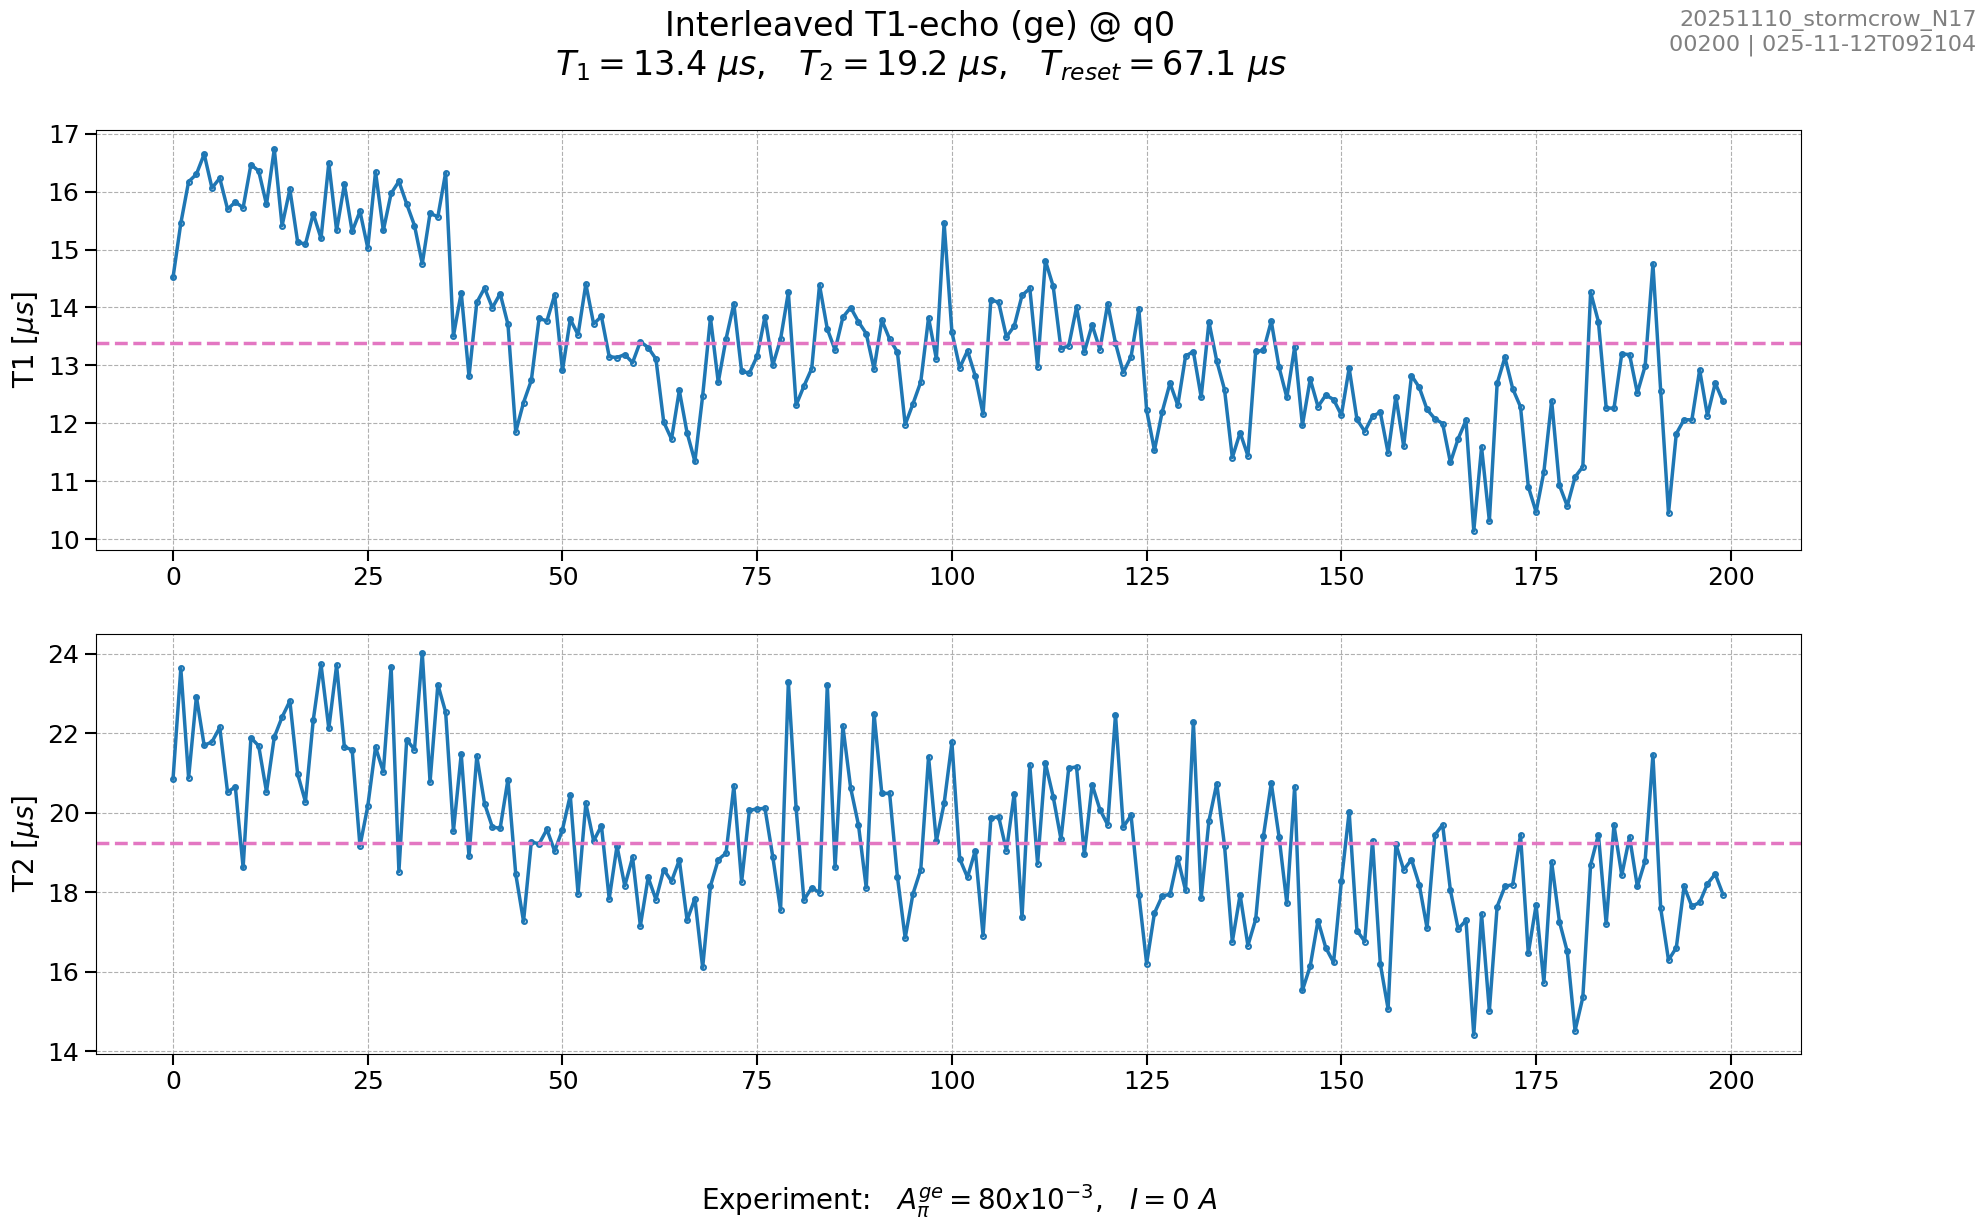

2025-11-12 10:26:11,475 - DEBUG - Disconnecting from yoko0 (Yokogawa_GS200)


In [41]:
from sqil_experiments.measurements.interleaved_T1_echo import InterleavedT1Echo
from sqil_experiments.measurements.T2_echo import EchoExperimentOptions
import numpy as np
from laboneq.dsl.enums import AcquisitionType

interleaved_exp = InterleavedT1Echo()

T1_value = interleaved_exp.qubit_value("ge_T1", "q0")
time = np.hstack(
    [
        np.linspace(0, T1_value, 11),
        np.logspace(np.log(T1_value * 1.1), np.log(5 * T1_value), 11, base=np.e),
    ]
)

options = EchoExperimentOptions()
options.acquisition_type = AcquisitionType.SPECTROSCOPY
options.count = 2**12

result = interleaved_exp.run(
    [time],
    sweeps={"index": np.arange(200)},
    options=options,
    update_params=False
)

### Ramsey

In [ ]:
from sqil_experiments.measurements.ramsey import Ramsey
import numpy as np
from laboneq_applications.experiments.options import (
    TuneupExperimentOptions,
)
from laboneq.dsl.enums import AcquisitionType

time = np.linspace(0.1e-6, 30e-6, 101)
detuning = 0.25e6

options = TuneupExperimentOptions()
options.acquisition_type = AcquisitionType.SPECTROSCOPY
options.count = 2**14


ramsey_exp = Ramsey()
result = ramsey_exp.run(
    [time],
    [detuning],
    sweeps={"index": np.arange(2)},
    options=options,
)

2025-10-14 02:34:33,019 - INFO - Successfully connected to zi
2025-10-14 02:34:33,020 - DEBUG - Connecting to yoko0 (Yokogawa_GS200)
2025-10-14 02:34:33,191 - INFO - Successfully connected to yoko0
2025-10-14 02:34:33,217 - INFO - Setting up instruments
2025-10-14 02:34:33,218 - INFO - Setting up yoko0
2025-10-14 02:34:33,221 - INFO -  -> Voltage limit 1 V
2025-10-14 02:34:33,222 - INFO -  -> Current range 0.001 A
2025-10-14 02:34:33,224 - DEBUG - Ramping current to 0 A on yoko0
2025-10-14 02:34:34,488 - DEBUG - Disconnecting from yoko0 (Yokogawa_GS200)
2025-10-14 02:34:34,492 - INFO - Before exp


Sweep:   0%|          | 0/2 [00:00<?, ?it/s]

2025-10-14 02:34:34,630 - INFO - *** ZI estimated runtime: 5.84 s ***
2025-10-14 02:34:34,630 - DEBUG - Connecting to yoko0 (Yokogawa_GS200)
2025-10-14 02:34:34,694 - DEBUG - Ramping current to 87.7 \mu A on yoko0
2025-10-14 02:34:35,938 - DEBUG - Disconnecting from yoko0 (Yokogawa_GS200)
2025-10-14 02:34:42,384 - INFO - *** ZI estimated runtime: 5.84 s ***
2025-10-14 02:34:42,385 - DEBUG - Connecting to yoko0 (Yokogawa_GS200)
2025-10-14 02:34:42,444 - DEBUG - Ramping current to 87.7 \mu A on yoko0
2025-10-14 02:34:42,452 - DEBUG - Disconnecting from yoko0 (Yokogawa_GS200)
2025-10-14 02:34:48,775 - ERROR - Error while analyzing the data cannot access local variable 'ax_proj' where it is not associated with a value
Traceback (most recent call last):
  File "c:\Users\sqil\AppData\Local\pypoetry\Cache\virtualenvs\sqil-experiments-gl8RHkKX-py3.12\Lib\site-packages\sqil_core\experiment\_experiment.py", line 331, in run_with_plottr
    anal_res = self.analyze(storage_path_local, *args, **run

### Single shot

2025-10-10 02:00:38,535 - INFO - Successfully connected to zi
2025-10-10 02:00:38,536 - DEBUG - Connecting to yoko0 (Yokogawa_GS200)
2025-10-10 02:00:38,592 - INFO - Successfully connected to yoko0
2025-10-10 02:00:38,618 - INFO - Setting up instruments
2025-10-10 02:00:38,619 - INFO - Setting up yoko0
2025-10-10 02:00:38,622 - INFO -  -> Voltage limit 1 V
2025-10-10 02:00:38,625 - INFO -  -> Current range 0.001 A
2025-10-10 02:00:38,627 - DEBUG - Ramping current to 0 A on yoko0
2025-10-10 02:00:38,636 - DEBUG - Disconnecting from yoko0 (Yokogawa_GS200)
2025-10-10 02:00:38,638 - INFO - Before exp
2025-10-10 02:00:38,664 - INFO - *** ZI estimated runtime: 0.20 s ***
2025-10-10 02:00:38,665 - DEBUG - Connecting to yoko0 (Yokogawa_GS200)
2025-10-10 02:00:38,714 - DEBUG - Ramping current to 0 A on yoko0
2025-10-10 02:00:38,723 - DEBUG - Disconnecting from yoko0 (Yokogawa_GS200)
[2025.10.10 02:00:39.472] ERROR   Hold-off errors detected, triggers arriving too fast.
Traceback (most recent ca

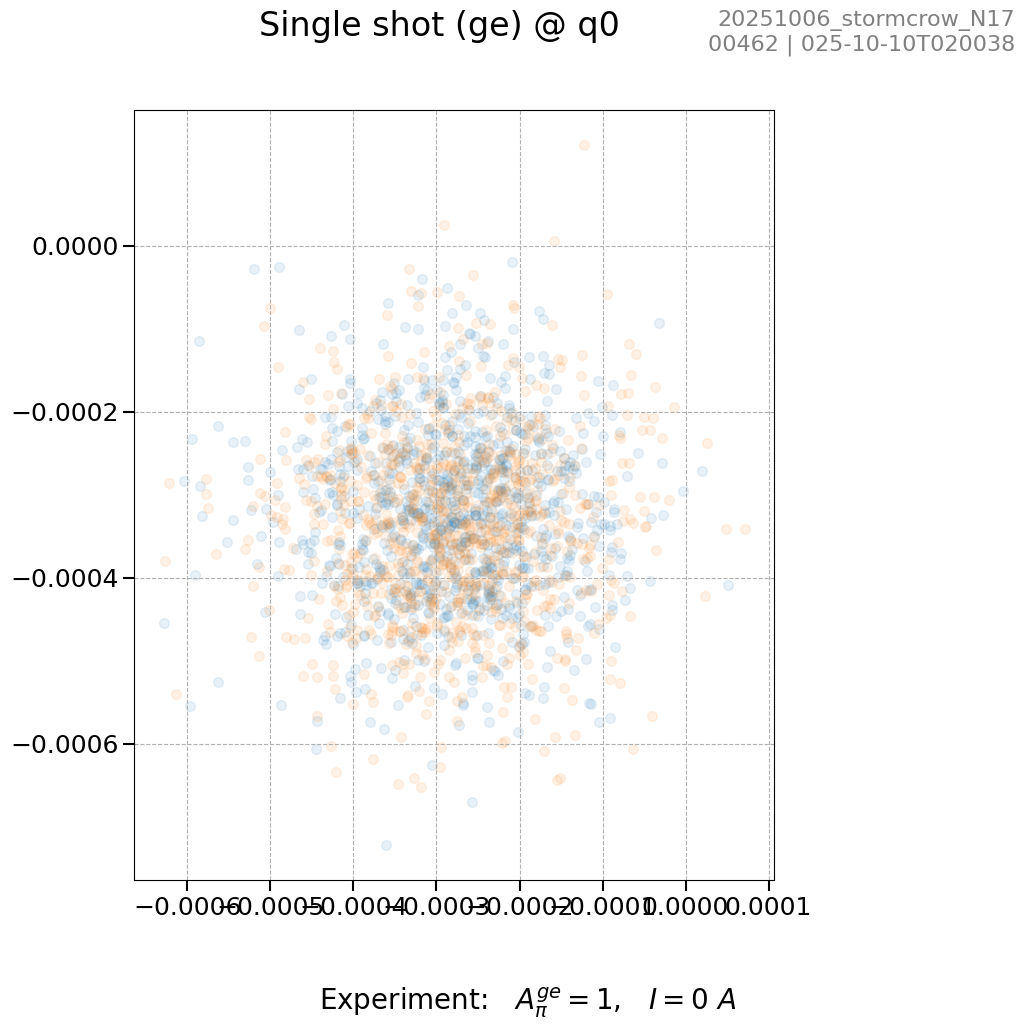

2025-10-10 02:00:40,354 - DEBUG - Disconnecting from yoko0 (Yokogawa_GS200)


[2025.10.10 02:06:03.269] ERROR   Hold-off errors detected, triggers arriving too fast.
Traceback (most recent call last):
  File "c:\Users\sqil\AppData\Local\pypoetry\Cache\virtualenvs\sqil-experiments-gl8RHkKX-py3.12\Lib\site-packages\zhinst\comms_schemas\labone\core\subscription.py", line 491, in _distribute_to_data_queues
    parsed_value = self._parser_callback(AnnotatedValue.from_capnp(value))
                                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sqil\AppData\Local\pypoetry\Cache\virtualenvs\sqil-experiments-gl8RHkKX-py3.12\Lib\site-packages\zhinst\comms_schemas\labone\core\value.py", line 77, in from_capnp
    value = _capnp_value_to_python_value(raw.value)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sqil\AppData\Local\pypoetry\Cache\virtualenvs\sqil-experiments-gl8RHkKX-py3.12\Lib\site-packages\zhinst\comms_schemas\labone\core\value.py", line 241, in _capnp_value_to_python_value
    return _TO_PYTHON_PARSER.get(union

In [ ]:
import numpy as np
from sqil_experiments.measurements.single_shot import SingleShot, SingleShotOptions
from laboneq.dsl.enums import AveragingMode, AcquisitionType

single_shot = SingleShot()
options = SingleShotOptions()
options.count = 1000
options.acquisition_type = AcquisitionType.SPECTROSCOPY

single_shot.qpu.quantum_elements[0].update(
    **{
        "current": 0e-6,
    }
)

result = single_shot.run(
    ['g', 'e'],
    qu_ids=["q0"],
    options=options,
    update_params=True,
    # pulse_sheet=0.3e-6
)

### Tests

In [ ]:
from laboneq import serializers
from laboneq_applications.analysis.iq_blobs import analysis_workflow

path = r"C:\Users\sqil\Desktop\data_local\20251006_stormcrow_N17\2025-10-10\00461-single_shot_2025-10-10T015616"

exp_result = serializers.load(f"{path}/zi_result.json")
qpu = serializers.load(f"{path}/qpu_old.json")
res = analysis_workflow(exp_result, qpu.quantum_elements, ["g", "e"]).run()

In [40]:
import numpy as np
10 + 20 * np.log10(0.022)

np.float64(-23.151546383555875)

average relative std: 0.45369850227250913
average std: 9.460869266857227e-05
std of the std: 1.3977359178516824e-05
relative std over std avg: 0.14773863568204568


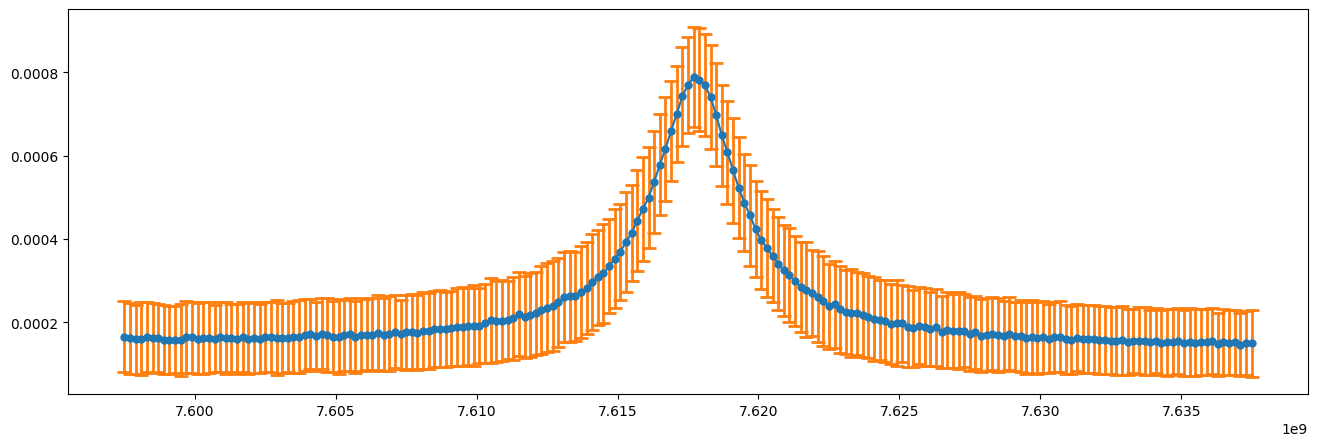

In [ ]:
import sqil_core as sqil
import matplotlib.pyplot as plt

# count = 2600
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-14\00163-rr_spectroscopy_2025-05-14T012721"
# count = 1048
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-14\00158-rr_spectroscopy_2025-05-14T012004"
# count = 200
# path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-14\00165-rr_spectroscopy_2025-05-14T014453"
# count = 100
# path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-14\00164-rr_spectroscopy_2025-05-14T012812"
# count = 2
# path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-14\00159-rr_spectroscopy_2025-05-14T012109"

data, freq, sweep = sqil.extract_h5_data(
    path, ["data", "frequencies", "sweep0"]
)
linmag = np.abs(data[0])
print(
    "average relative std:", np.mean(np.std(linmag, axis=0) / np.mean(linmag, axis=0))
)
print("average std:", np.mean(np.std(linmag, axis=0)))
print("std of the std:", np.std(np.std(linmag, axis=0)))
print(
    "relative std over std avg:",
    np.mean(np.std(np.std(linmag, axis=0)) / np.mean(np.std(linmag, axis=0))),
)

plt.figure(figsize=(16, 5))
plt.errorbar(
    freq[0],
    np.mean(linmag, axis=0),
    np.std(linmag, axis=0),
    fmt="-o",
    color="tab:blue",
    label="Mean with Error",
    ecolor="tab:orange",
    capsize=5,
    capthick=2,
    elinewidth=2,
    markersize=5,
)
plt.show()

## CW

### Resonator spectroscopy

Connected to: Rohde&Schwarz SGS100A (serial:1416.0505k02/114909, firmware:4.2.366.0-5.00.232.72) in 0.04s


Sweep:   0%|          | 0/21 [00:00<?, ?it/s]

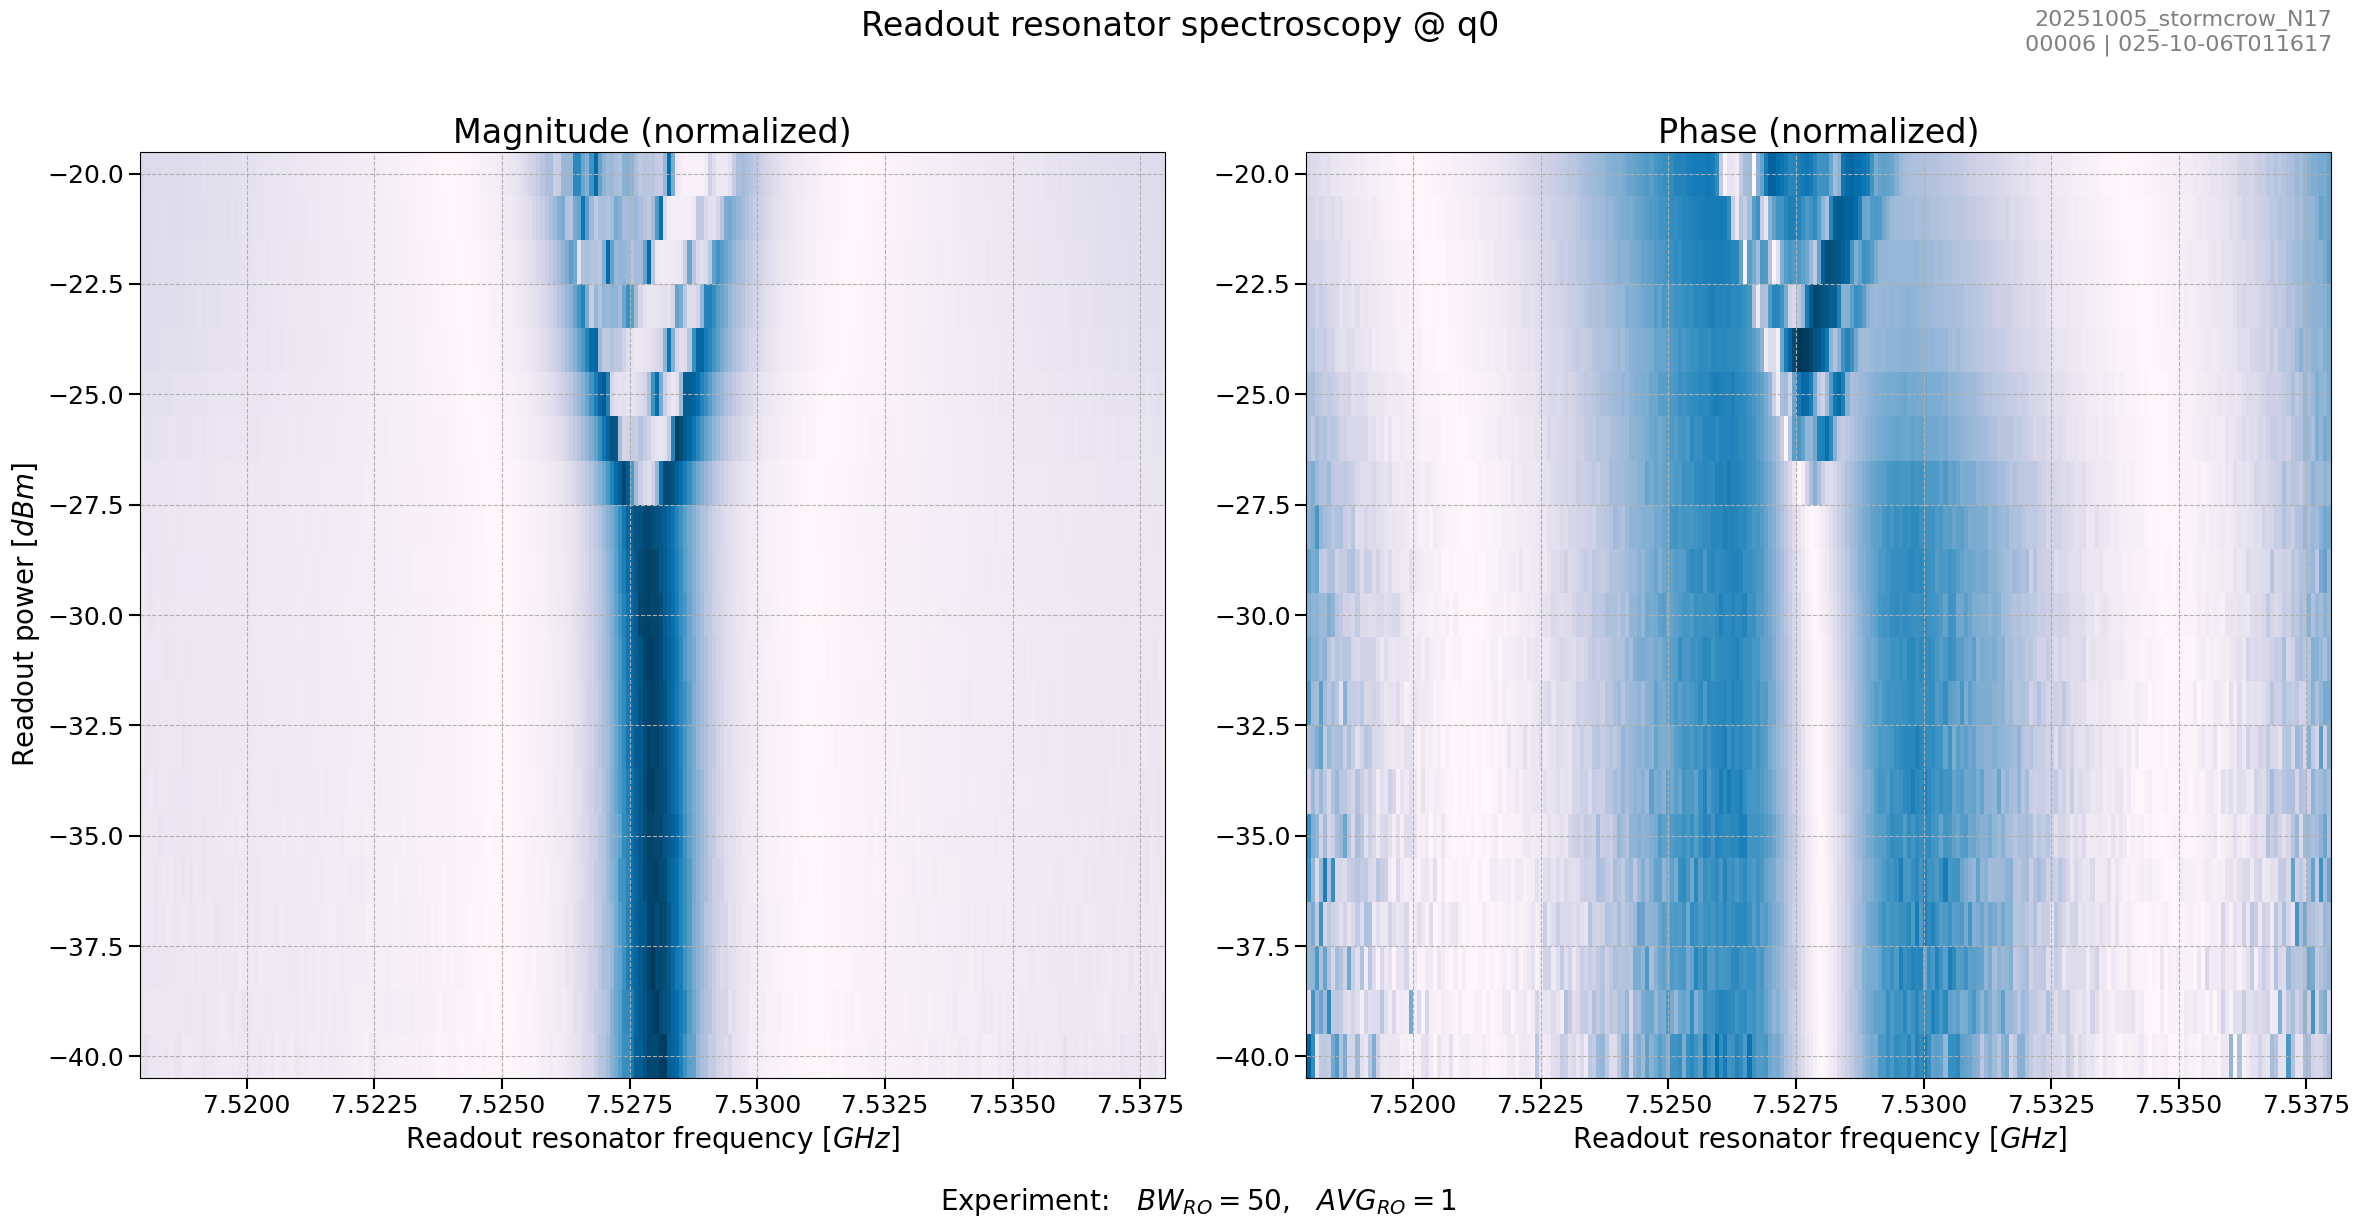

In [ ]:
import numpy as np
from cw_rr_spec import CW_RRSpec
from sqil_core import logger

logger.setLevel(30)

rr_spec = CW_RRSpec()

rr_spec.qpu.quantum_elements[0].update(
    **{
        "readout_acquire_bandwith": 50,
        "readout_acquire_averages": 1
    }
)

result = rr_spec.run(
    # [np.linspace(7e9, 8e9, 2001)],
    [rr_spec.sweep_around("readout_resonator_frequency", 10e6, n_points=251)],
    sweeps={"readout_power": np.linspace(-40, -20, 21)},
    # sweeps={"current": np.linspace(0.023e-3, 0.075e-3, 201)},
    qu_ids=["q0"],
    update_params=True,
)

- Half flux `0.0883e-3`
- Flux period `-0.025e-3 -> 0.091e-3`

- ge `5.450551721`
- ef `5.189373428`

- Ec_t `0.2612`

### Qubit spectroscopy

Connected to: Rohde&Schwarz SGS100A (serial:1416.0505k02/114909, firmware:4.2.366.0-5.00.232.72) in 0.02s


Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

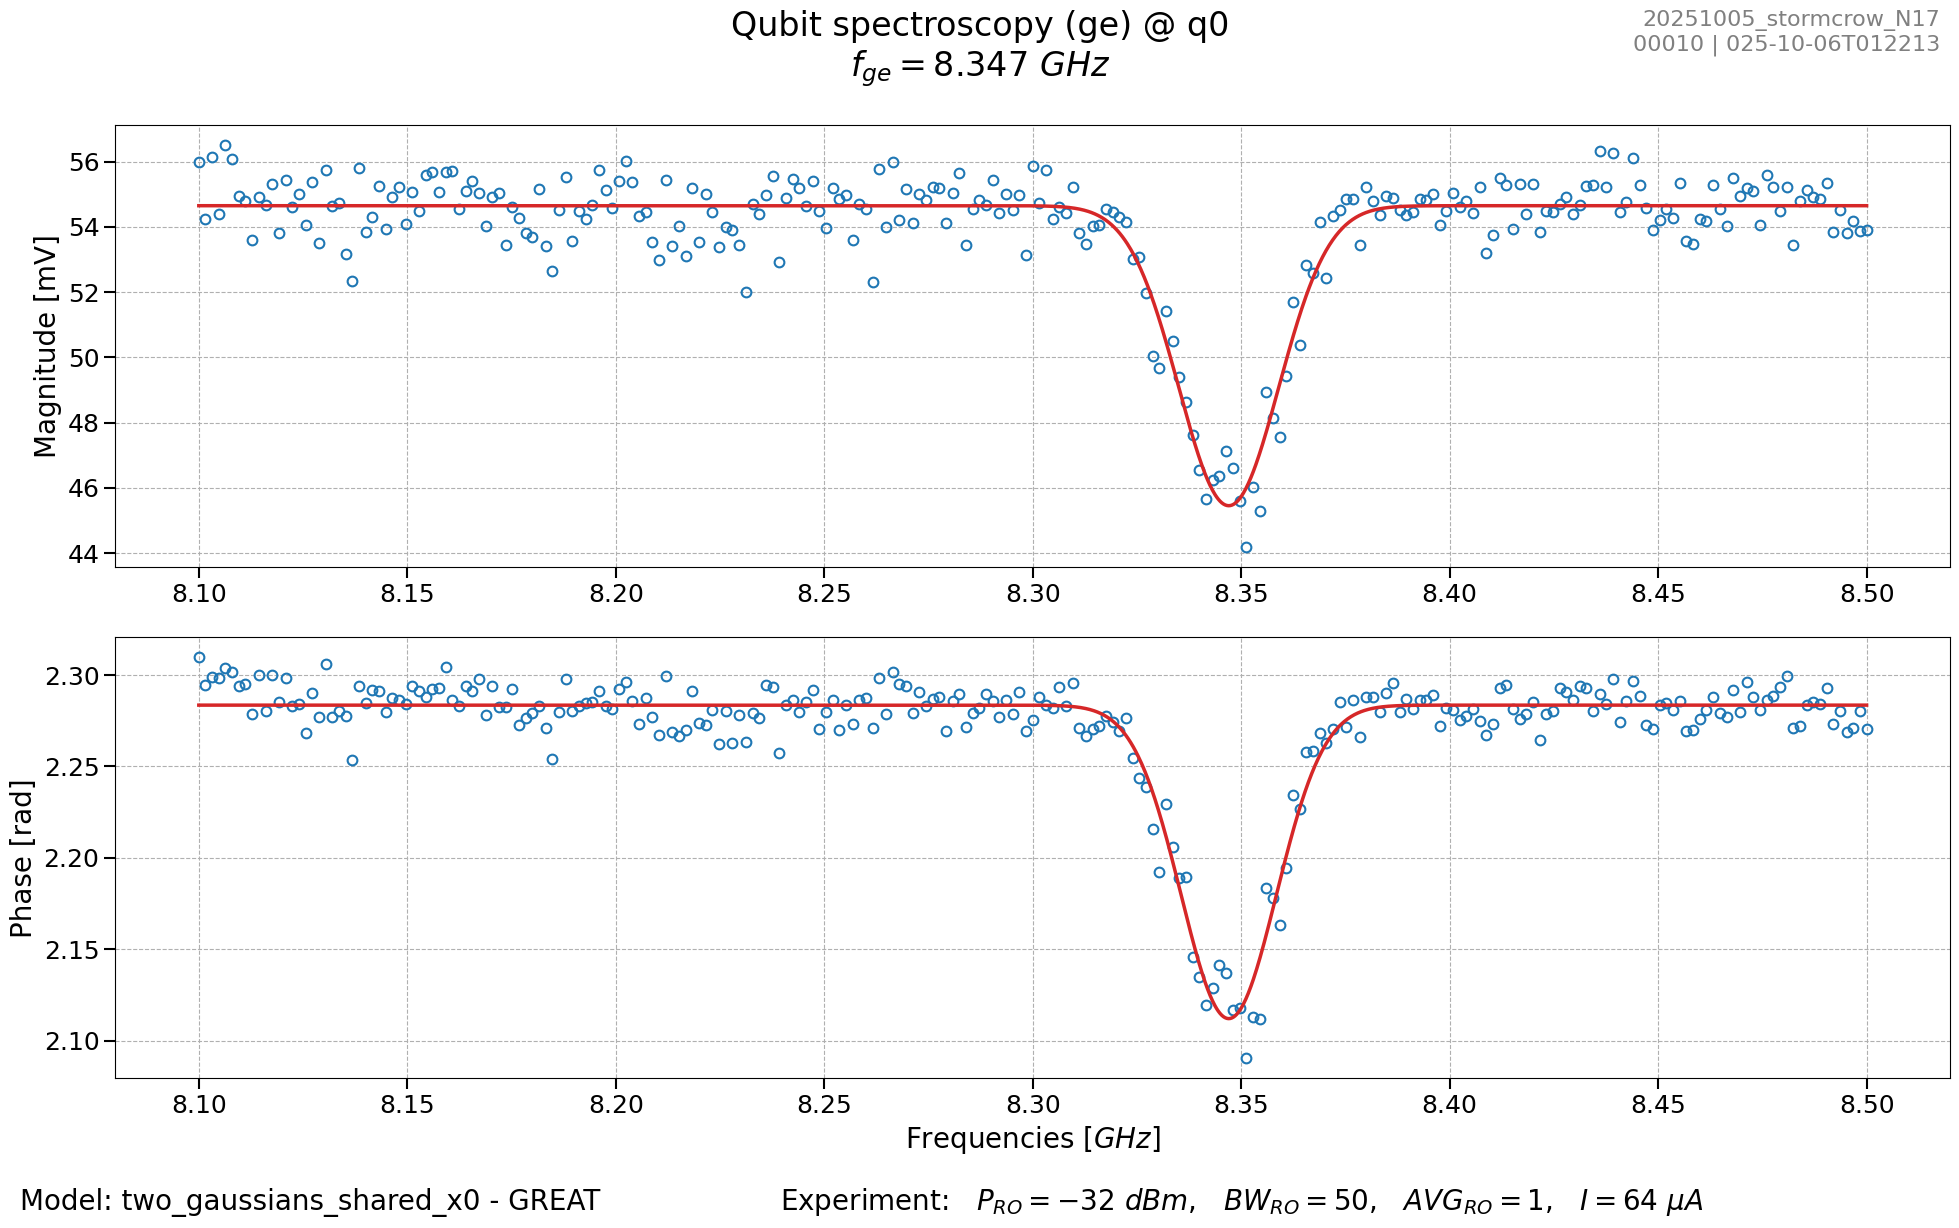

In [ ]:
import numpy as np
from cw_qu_spec import CW_QuSpec
from sqil_core import logger

logger.setLevel(30)

qu_spec = CW_QuSpec()

fit_points = 1e-3 * np.array([-0.015, 0.020, 0.058, 0.0883, 0.1225, 0.140])

qu_spec.qpu.quantum_elements[0].update(
**{
    "current": 0.064e-3,
    "drive_power": -1,
    "readout_acquire_bandwith": 50,
    "readout_acquire_averages": 1
})

result = qu_spec.run(
    [np.linspace(8.1e9, 8.5e9, 251)],
    # [qu_spec.sweep_around("resonance_frequency_ge", 500e6, n_points=1001)],
    # sweeps={"readout_power": np.linspace(10, 25, 16)},
    # sweeps={"current": np.linspace(0.01e-3, 0.0e-3, 3)},
    # sweeps={"current": fit_points},
    qu_ids=["q0"],
    update_params=False,
)

10 line - 1.5h

In [ ]:
import numpy as np
from cw_qu_spec import CW_QuSpec

qu_spec = CW_QuSpec()

qu_spec.qpu.quantum_elements[0].update(
    **{
        "drive_power": -37,
        "readout_acquire_bandwith": 20,
        "readout_acquire_averages": 1,
    }
)

result = qu_spec.run(
    [np.linspace(5.38e9, 5.48e9, 151)],
    sweeps={"current": np.linspace(-0.025e-3, 0.10e-3, 300)},
    qu_ids=["q0"],
    update_params=False,
)

11 line - 1.5h

Connected to: Rohde&Schwarz SGS100A (serial:1416.0505k02/114909, firmware:4.2.366.0-5.00.232.72) in 0.03s


Sweep:   0%|          | 0/101 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

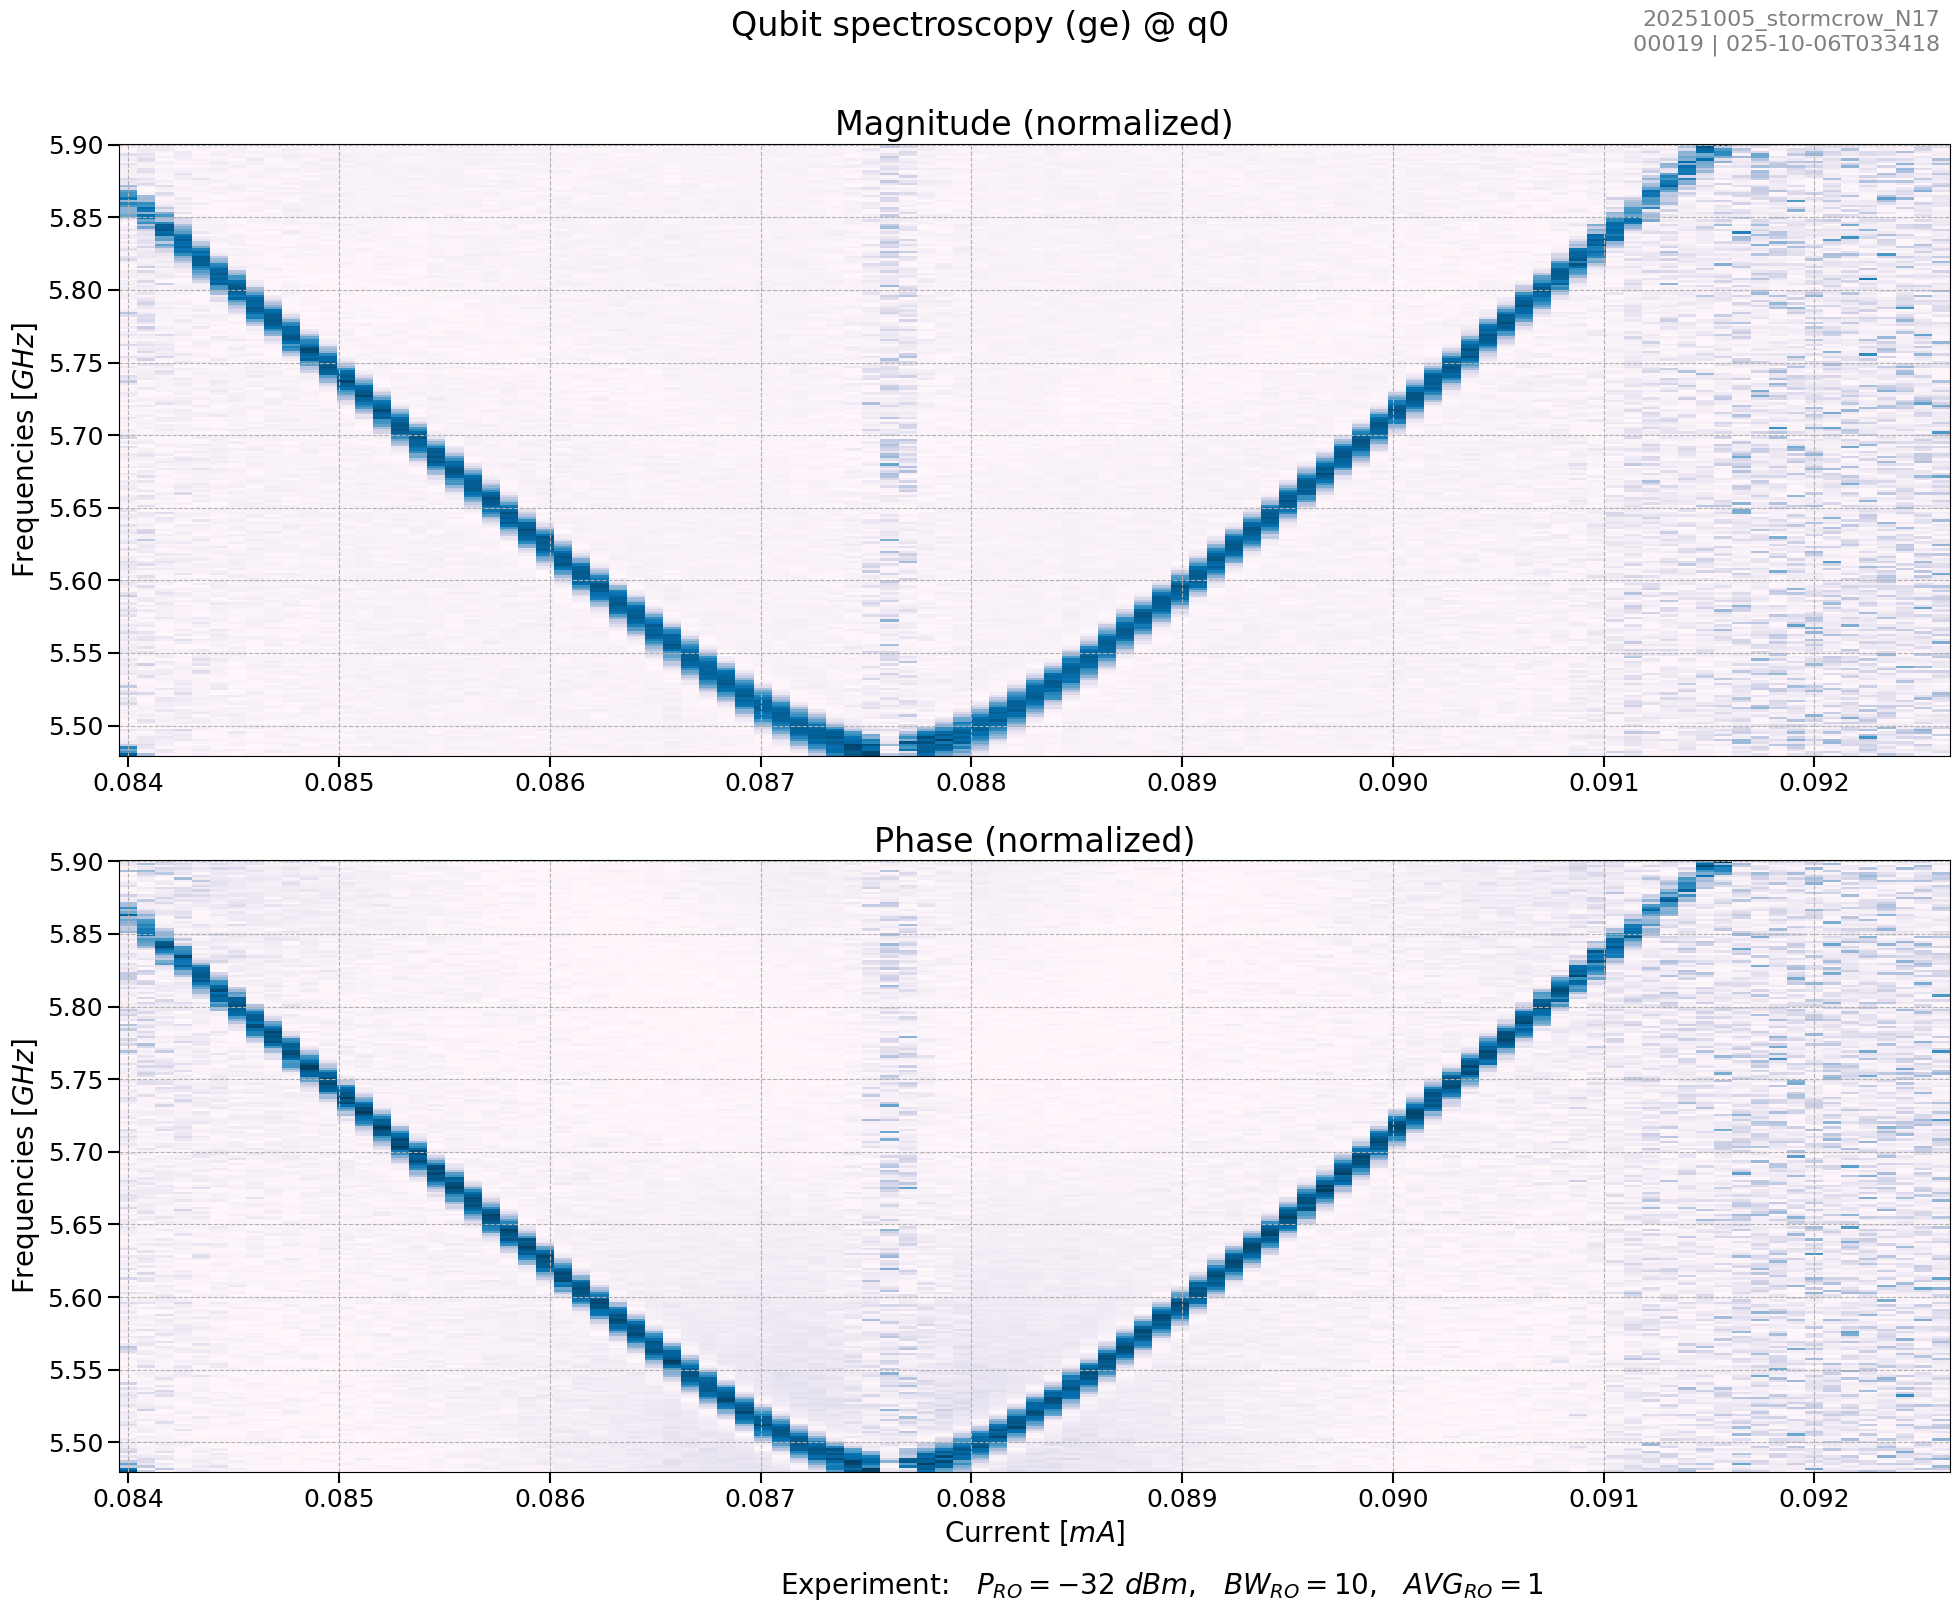

In [ ]:
import numpy as np
from cw_qu_spec import CW_QuSpec

qu_spec = CW_QuSpec()

qu_spec.qpu.quantum_elements[0].update(
    **{
        "drive_power": -15,
        "readout_acquire_bandwith": 10,
        "readout_acquire_averages": 1,
    }
)

result = qu_spec.run(
    [np.linspace(5.48e9, 5.90e9, 251)],
    sweeps={"current": np.linspace(0.0840e-3, 0.0926e-3, 101)},
    qu_ids=["q0"],
    update_params=False,
)

01 left - 11 min

Connected to: Rohde&Schwarz SGS100A (serial:1416.0505k02/114909, firmware:4.2.366.0-5.00.232.72) in 0.02s


Sweep:   0%|          | 0/26 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

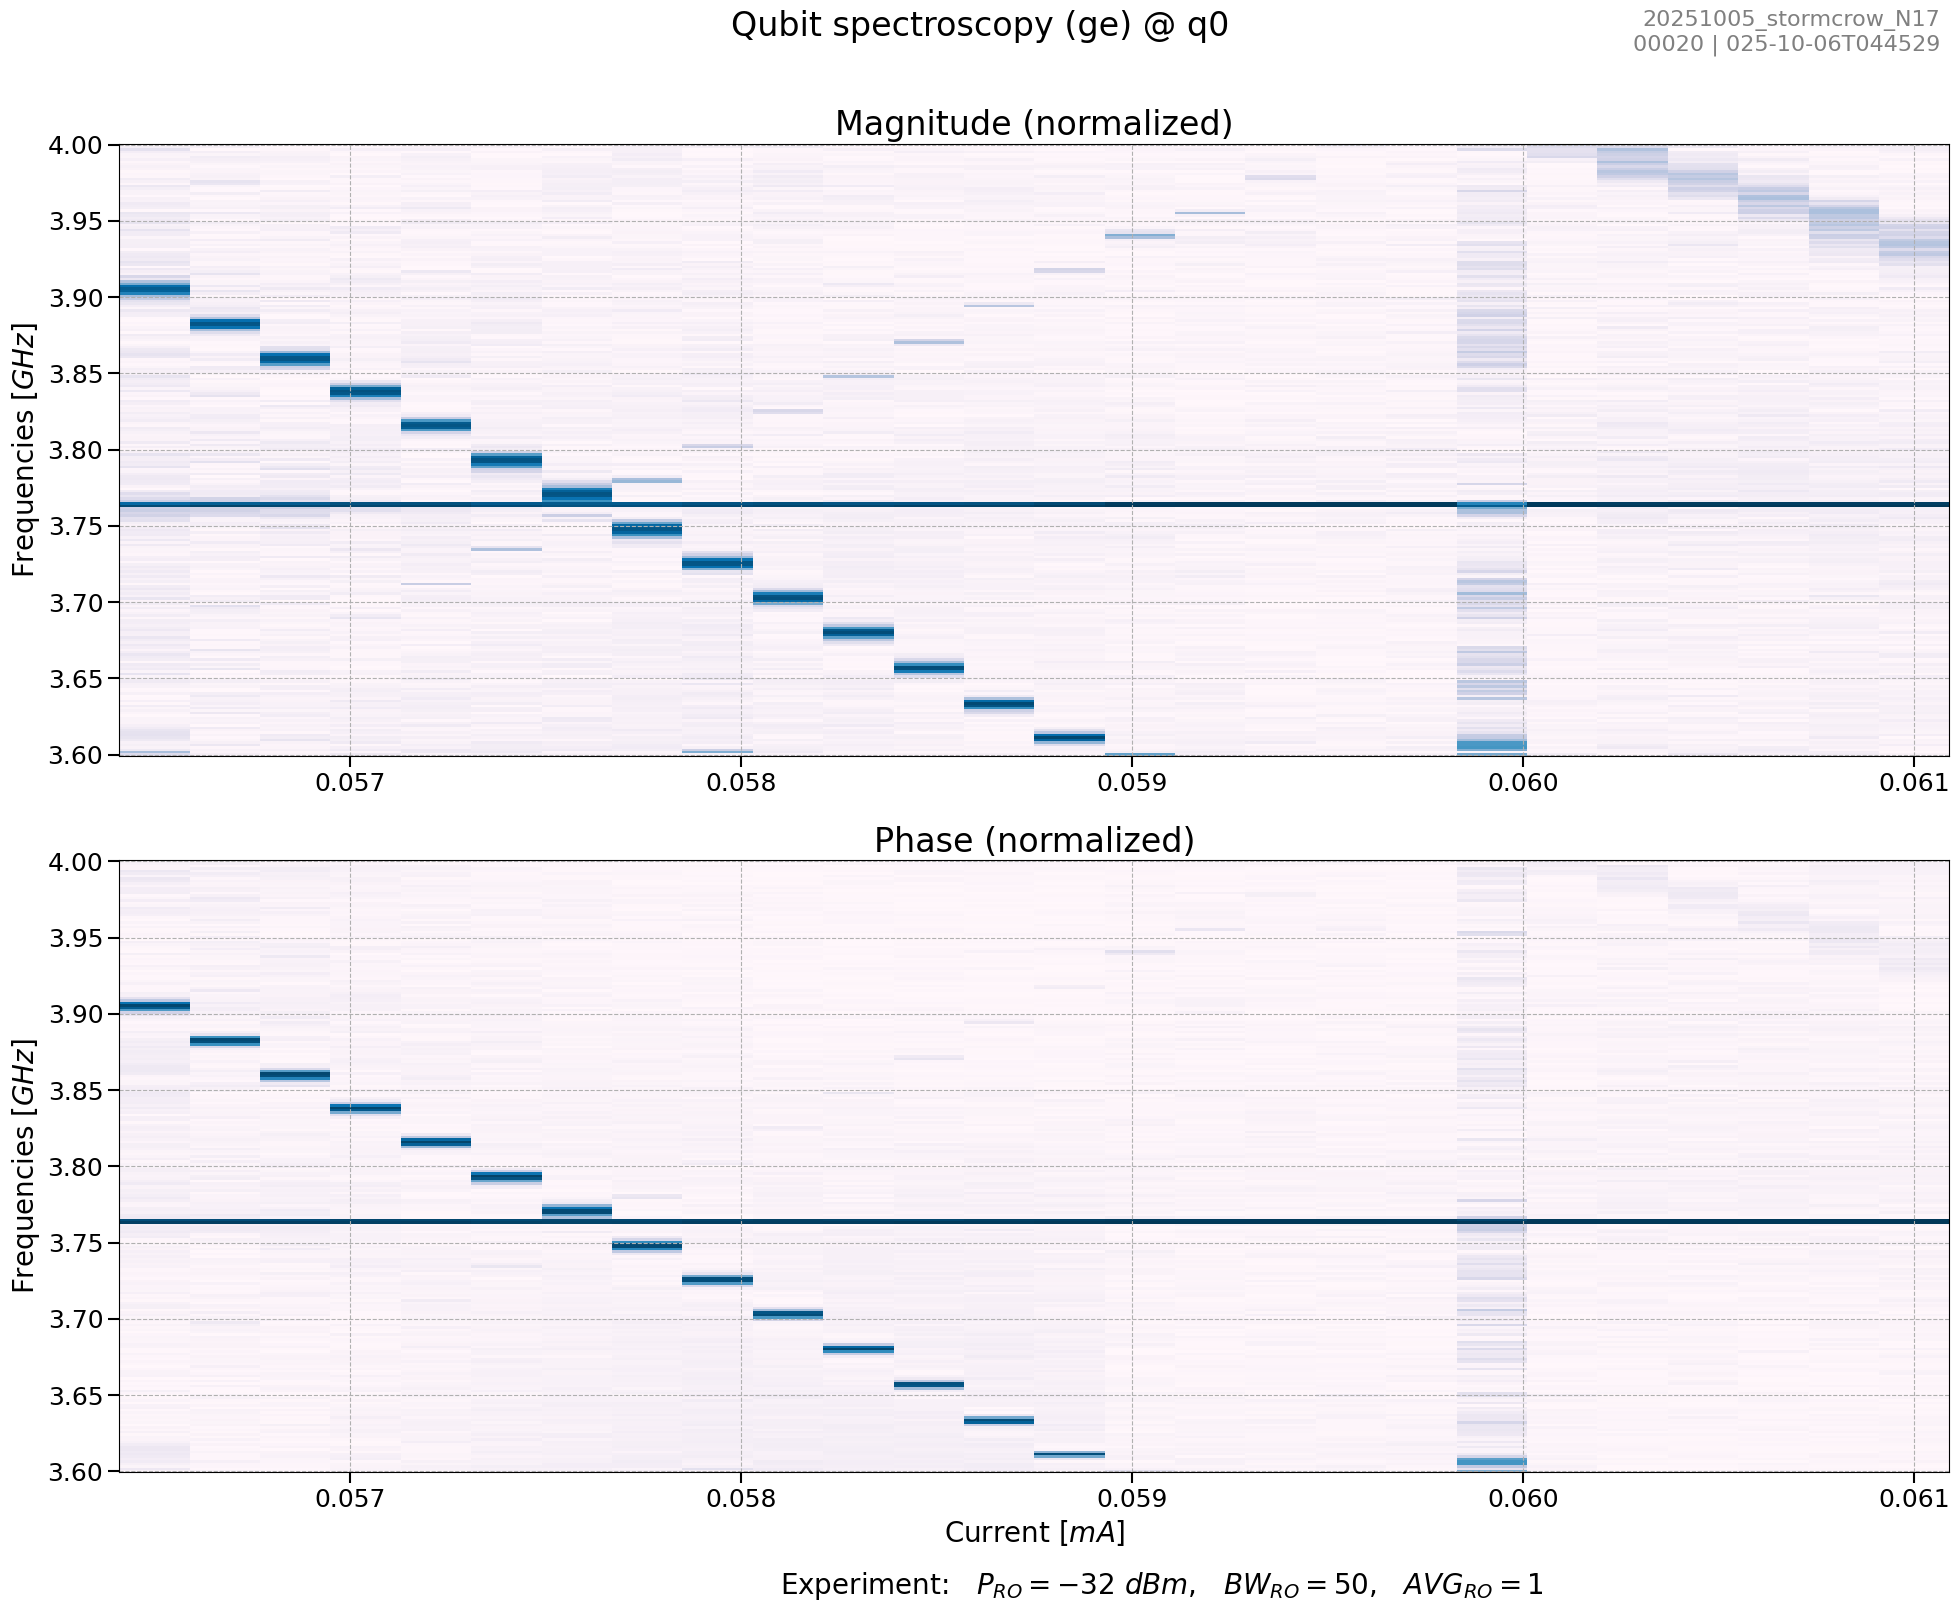

In [ ]:
import numpy as np
from cw_qu_spec import CW_QuSpec

qu_spec = CW_QuSpec()

qu_spec.qpu.quantum_elements[0].update(
    **{
        "drive_power": 10,
        "readout_acquire_bandwith": 50,
        "readout_acquire_averages": 1,
    }
)

result = qu_spec.run(
    [np.linspace(3.6e9, 4.0e9, 251)],
    sweeps={"current": np.linspace(0.0565e-3, 0.061e-3, 26)},
    qu_ids=["q0"],
    update_params=False,
)

01 right - 11 min

Connected to: Rohde&Schwarz SGS100A (serial:1416.0505k02/114909, firmware:4.2.366.0-5.00.232.72) in 0.04s


Sweep:   0%|          | 0/26 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

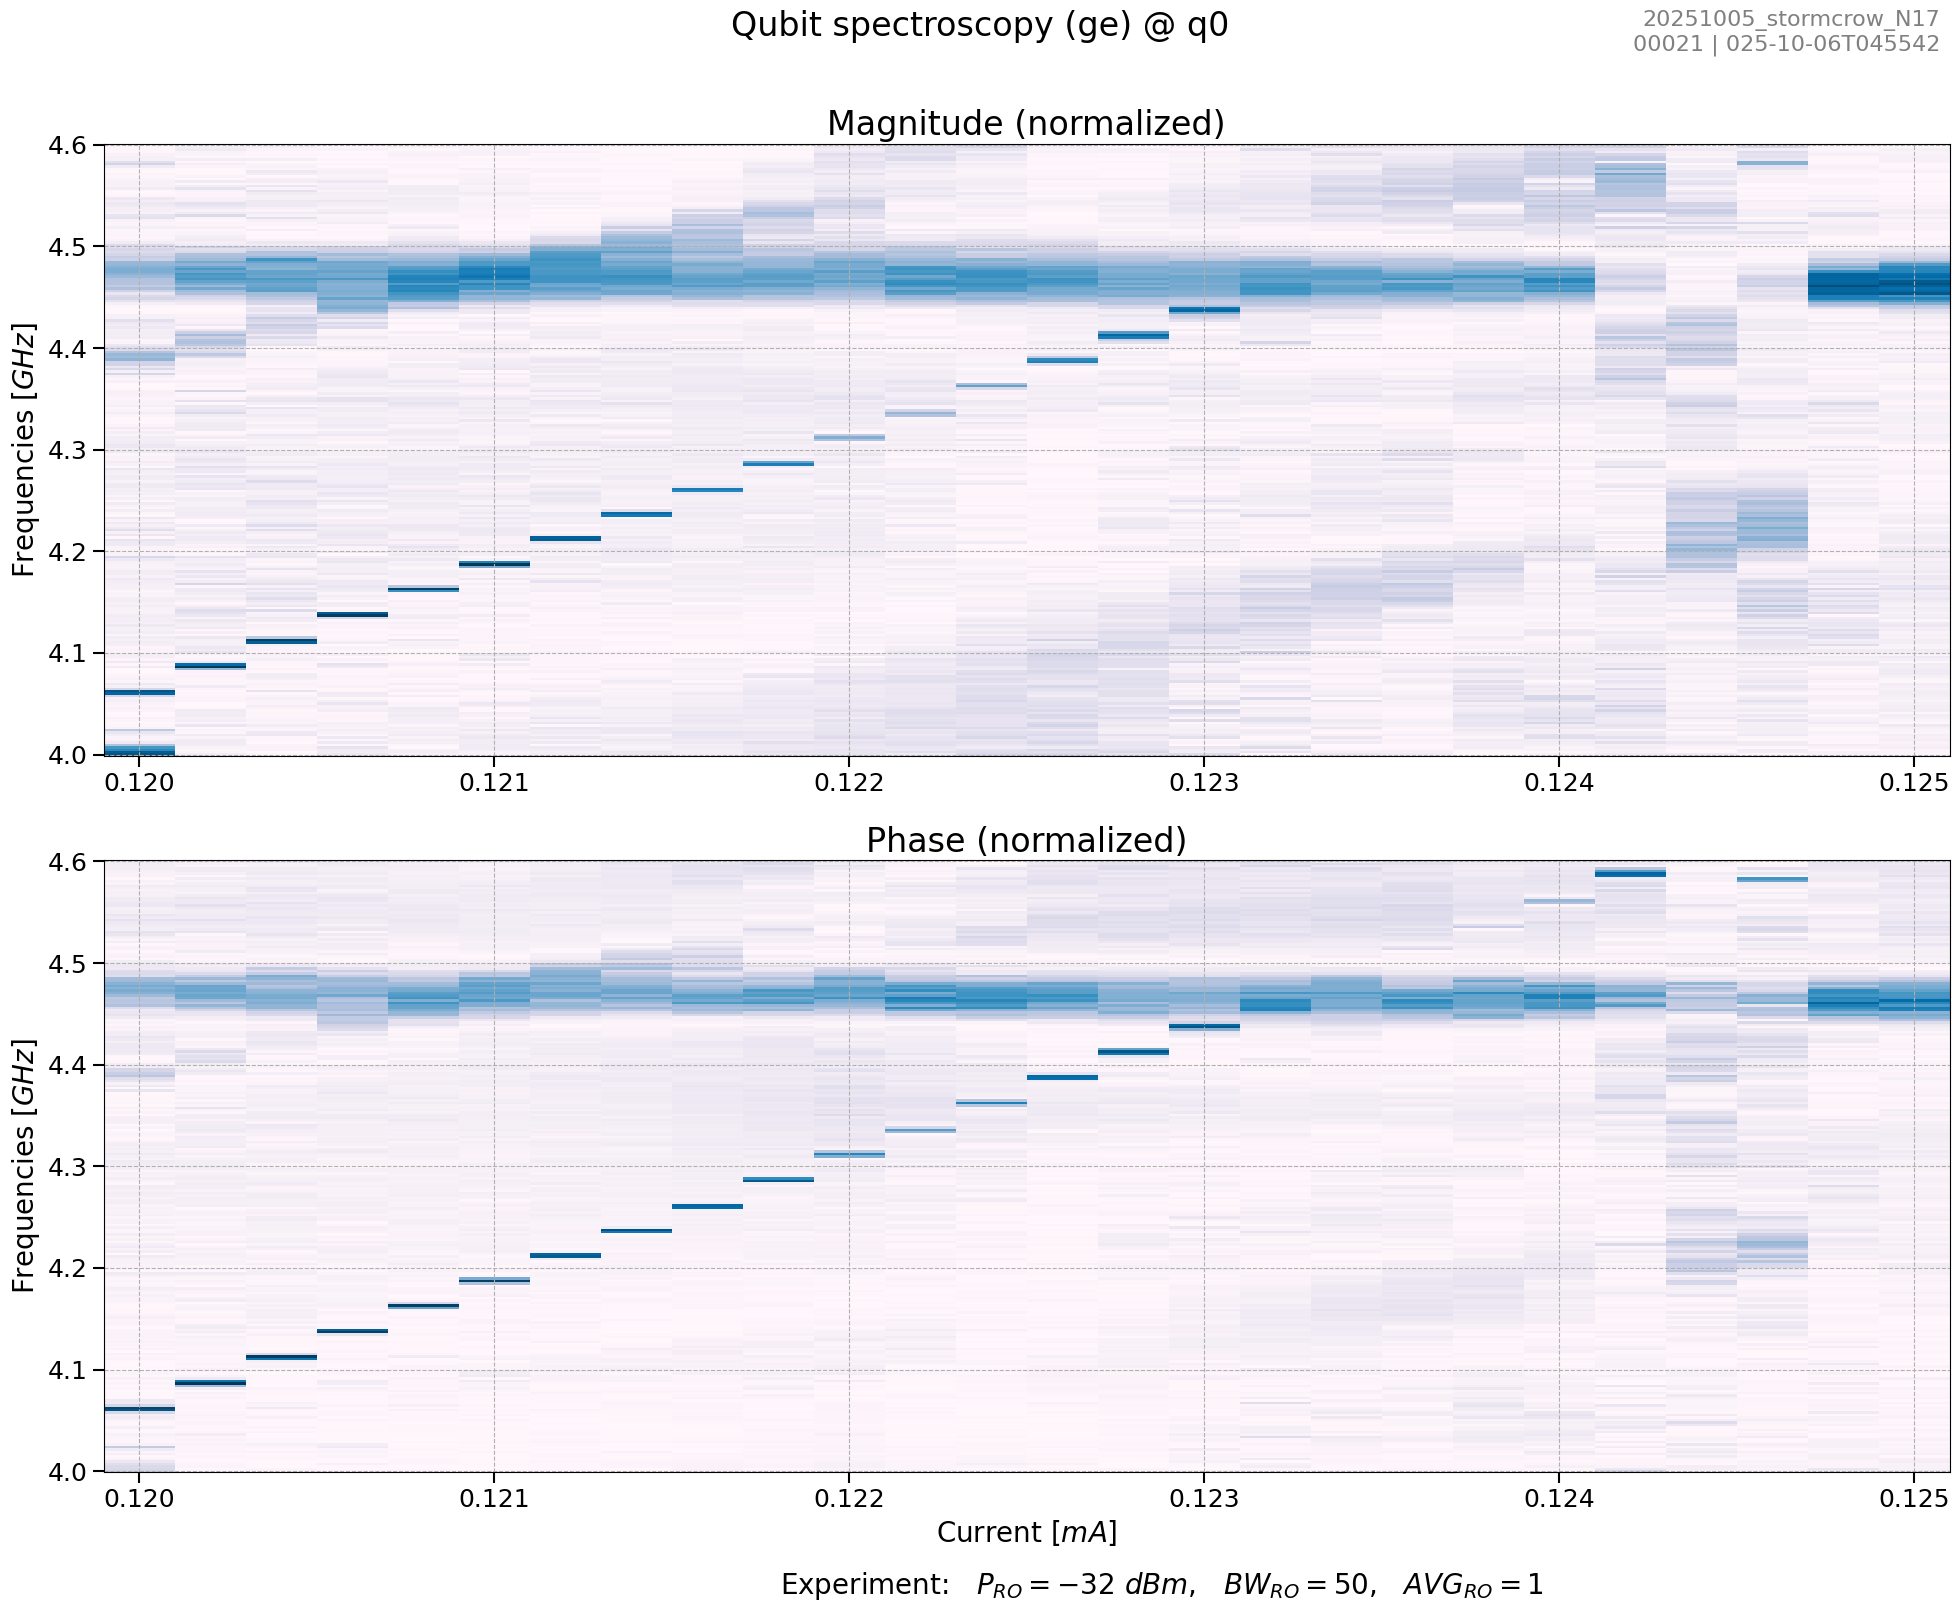

In [ ]:
import numpy as np
from cw_qu_spec import CW_QuSpec

qu_spec = CW_QuSpec()

qu_spec.qpu.quantum_elements[0].update(
    **{
        "drive_power": 10,
        "readout_acquire_bandwith": 50,
        "readout_acquire_averages": 1,
    }
)

result = qu_spec.run(
    [np.linspace(4.0e9, 4.6e9, 251)],
    sweeps={"current": np.linspace(0.120e-3, 0.125e-3, 26)},
    qu_ids=["q0"],
    update_params=False,
)

11 left - 11 min

Connected to: Rohde&Schwarz SGS100A (serial:1416.0505k02/114909, firmware:4.2.366.0-5.00.232.72) in 0.01s


Sweep:   0%|          | 0/26 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/251 [00:00<?, ?it/s]

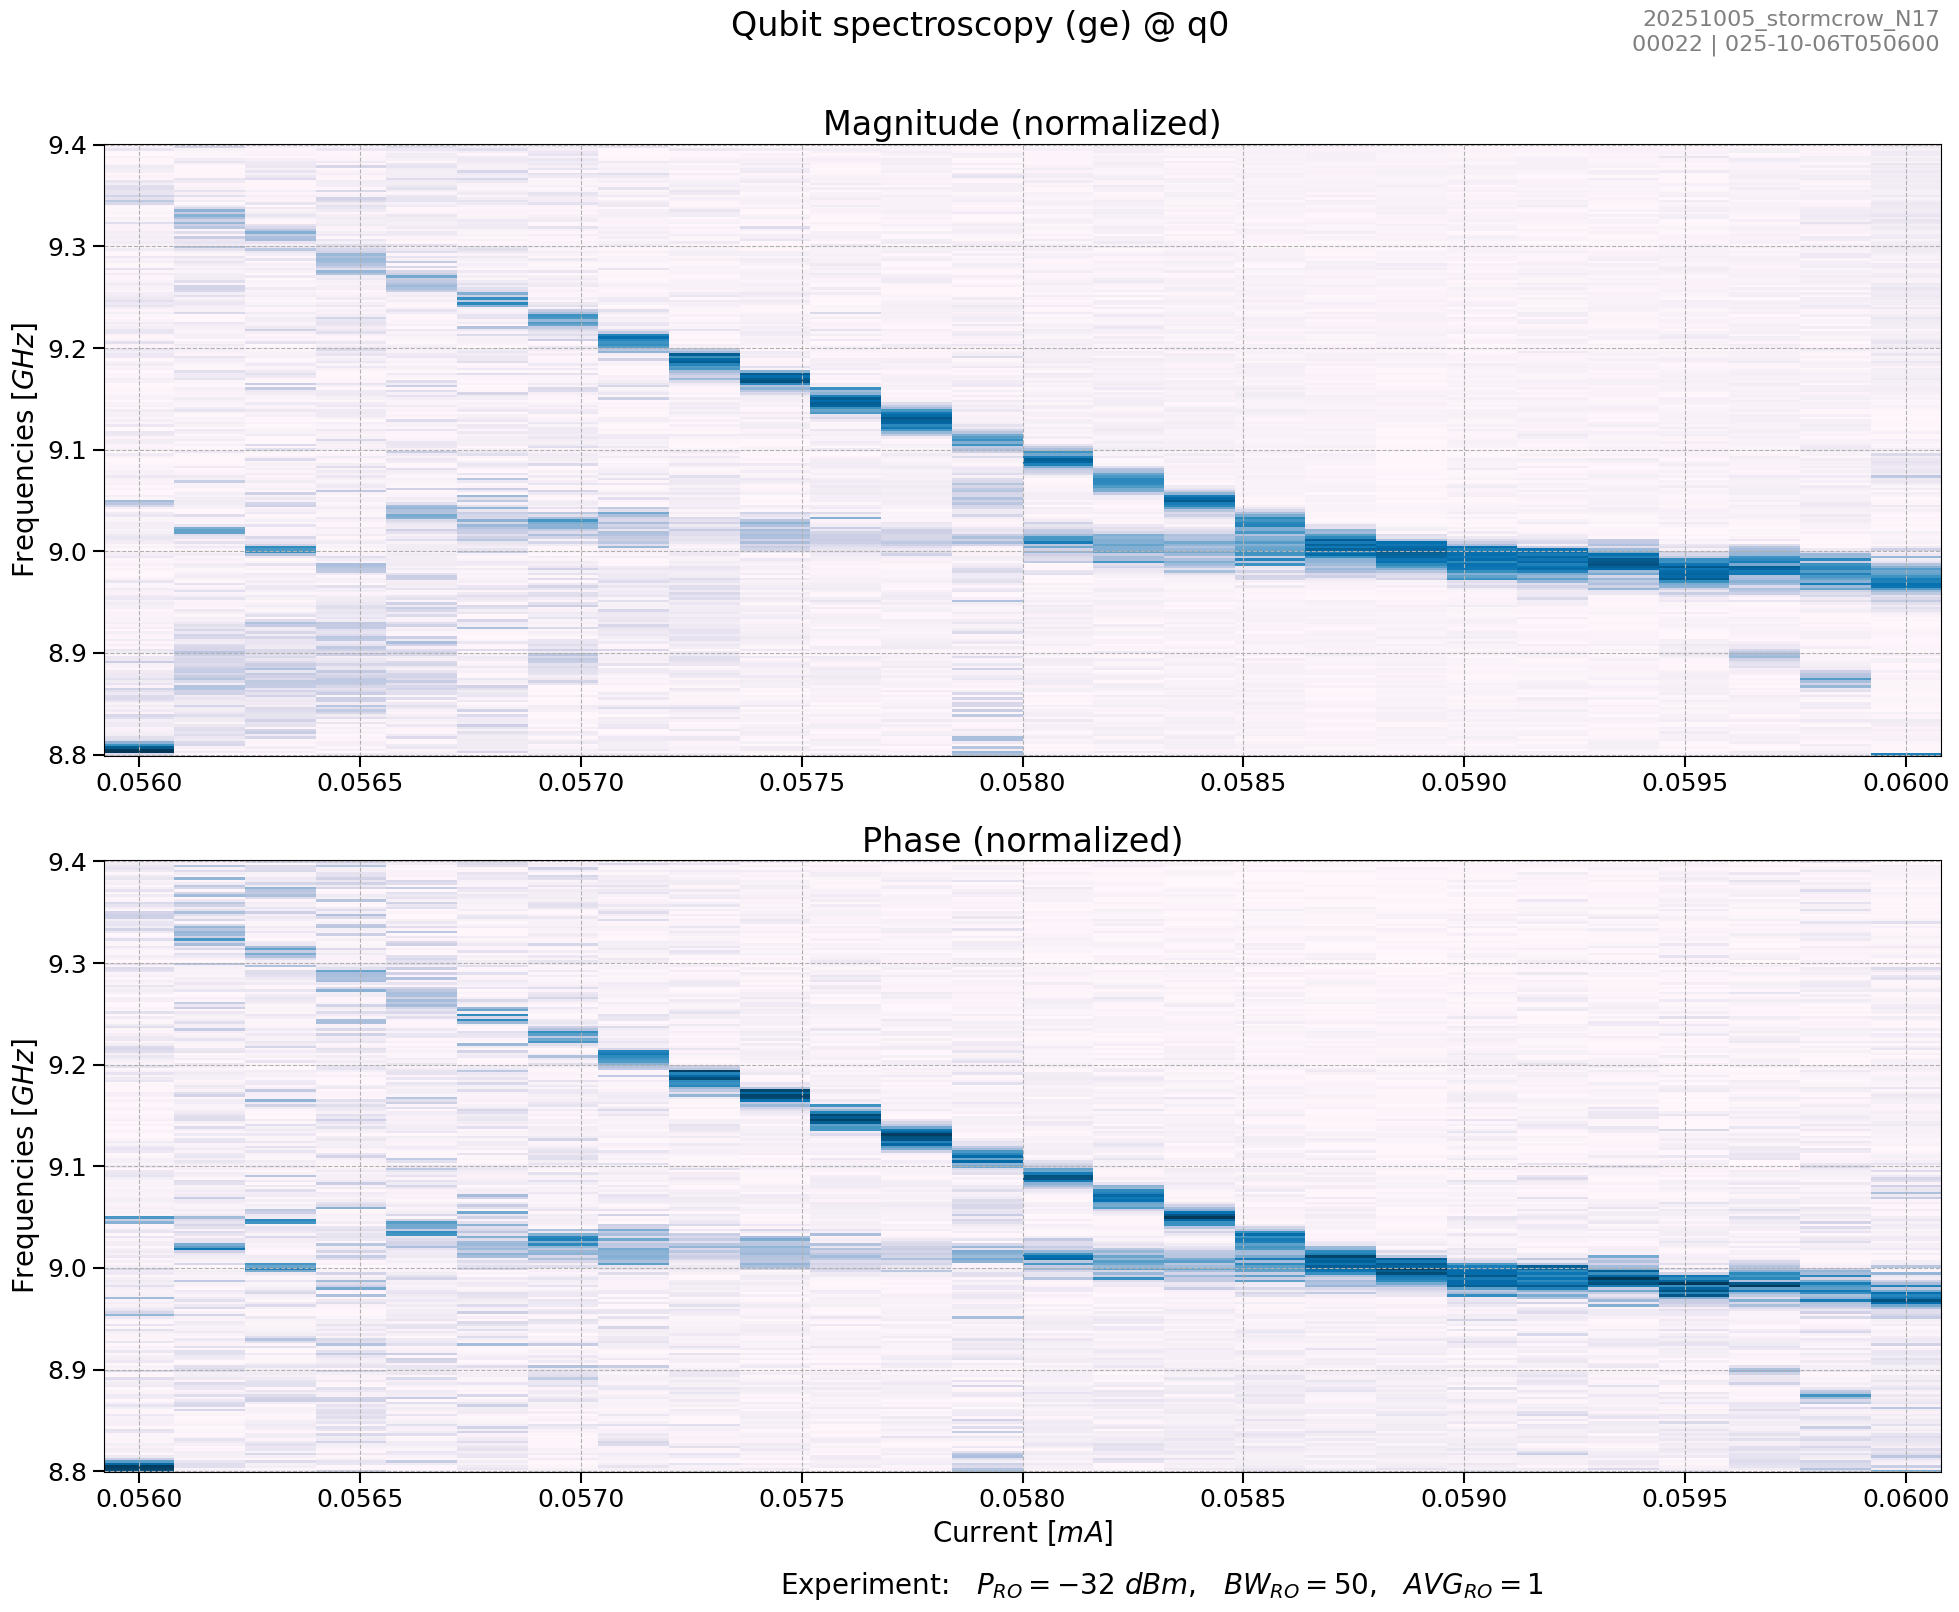

In [ ]:
import numpy as np
from cw_qu_spec import CW_QuSpec

qu_spec = CW_QuSpec()

qu_spec.qpu.quantum_elements[0].update(
    **{
        "drive_power": 5,
        "readout_acquire_bandwith": 50,
        "readout_acquire_averages": 1,
    }
)

result = qu_spec.run(
    [np.linspace(8.8e9, 9.4e9, 251)],
    sweeps={"current": np.linspace(0.056e-3, 0.060e-3, 26)},
    qu_ids=["q0"],
    update_params=False,
)

20 anti corssing - 15 min

Connected to: Rohde&Schwarz SGS100A (serial:1416.0505k02/114909, firmware:4.2.366.0-5.00.232.72) in 0.04s


Sweep:   0%|          | 0/26 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/201 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/201 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/201 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/201 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/201 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/201 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/201 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/201 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/201 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/201 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/201 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/201 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/201 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/201 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/201 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/201 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/201 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/201 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/201 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/201 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/201 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/201 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/201 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/201 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/201 [00:00<?, ?it/s]

Drive frequency:   0%|          | 0/201 [00:00<?, ?it/s]

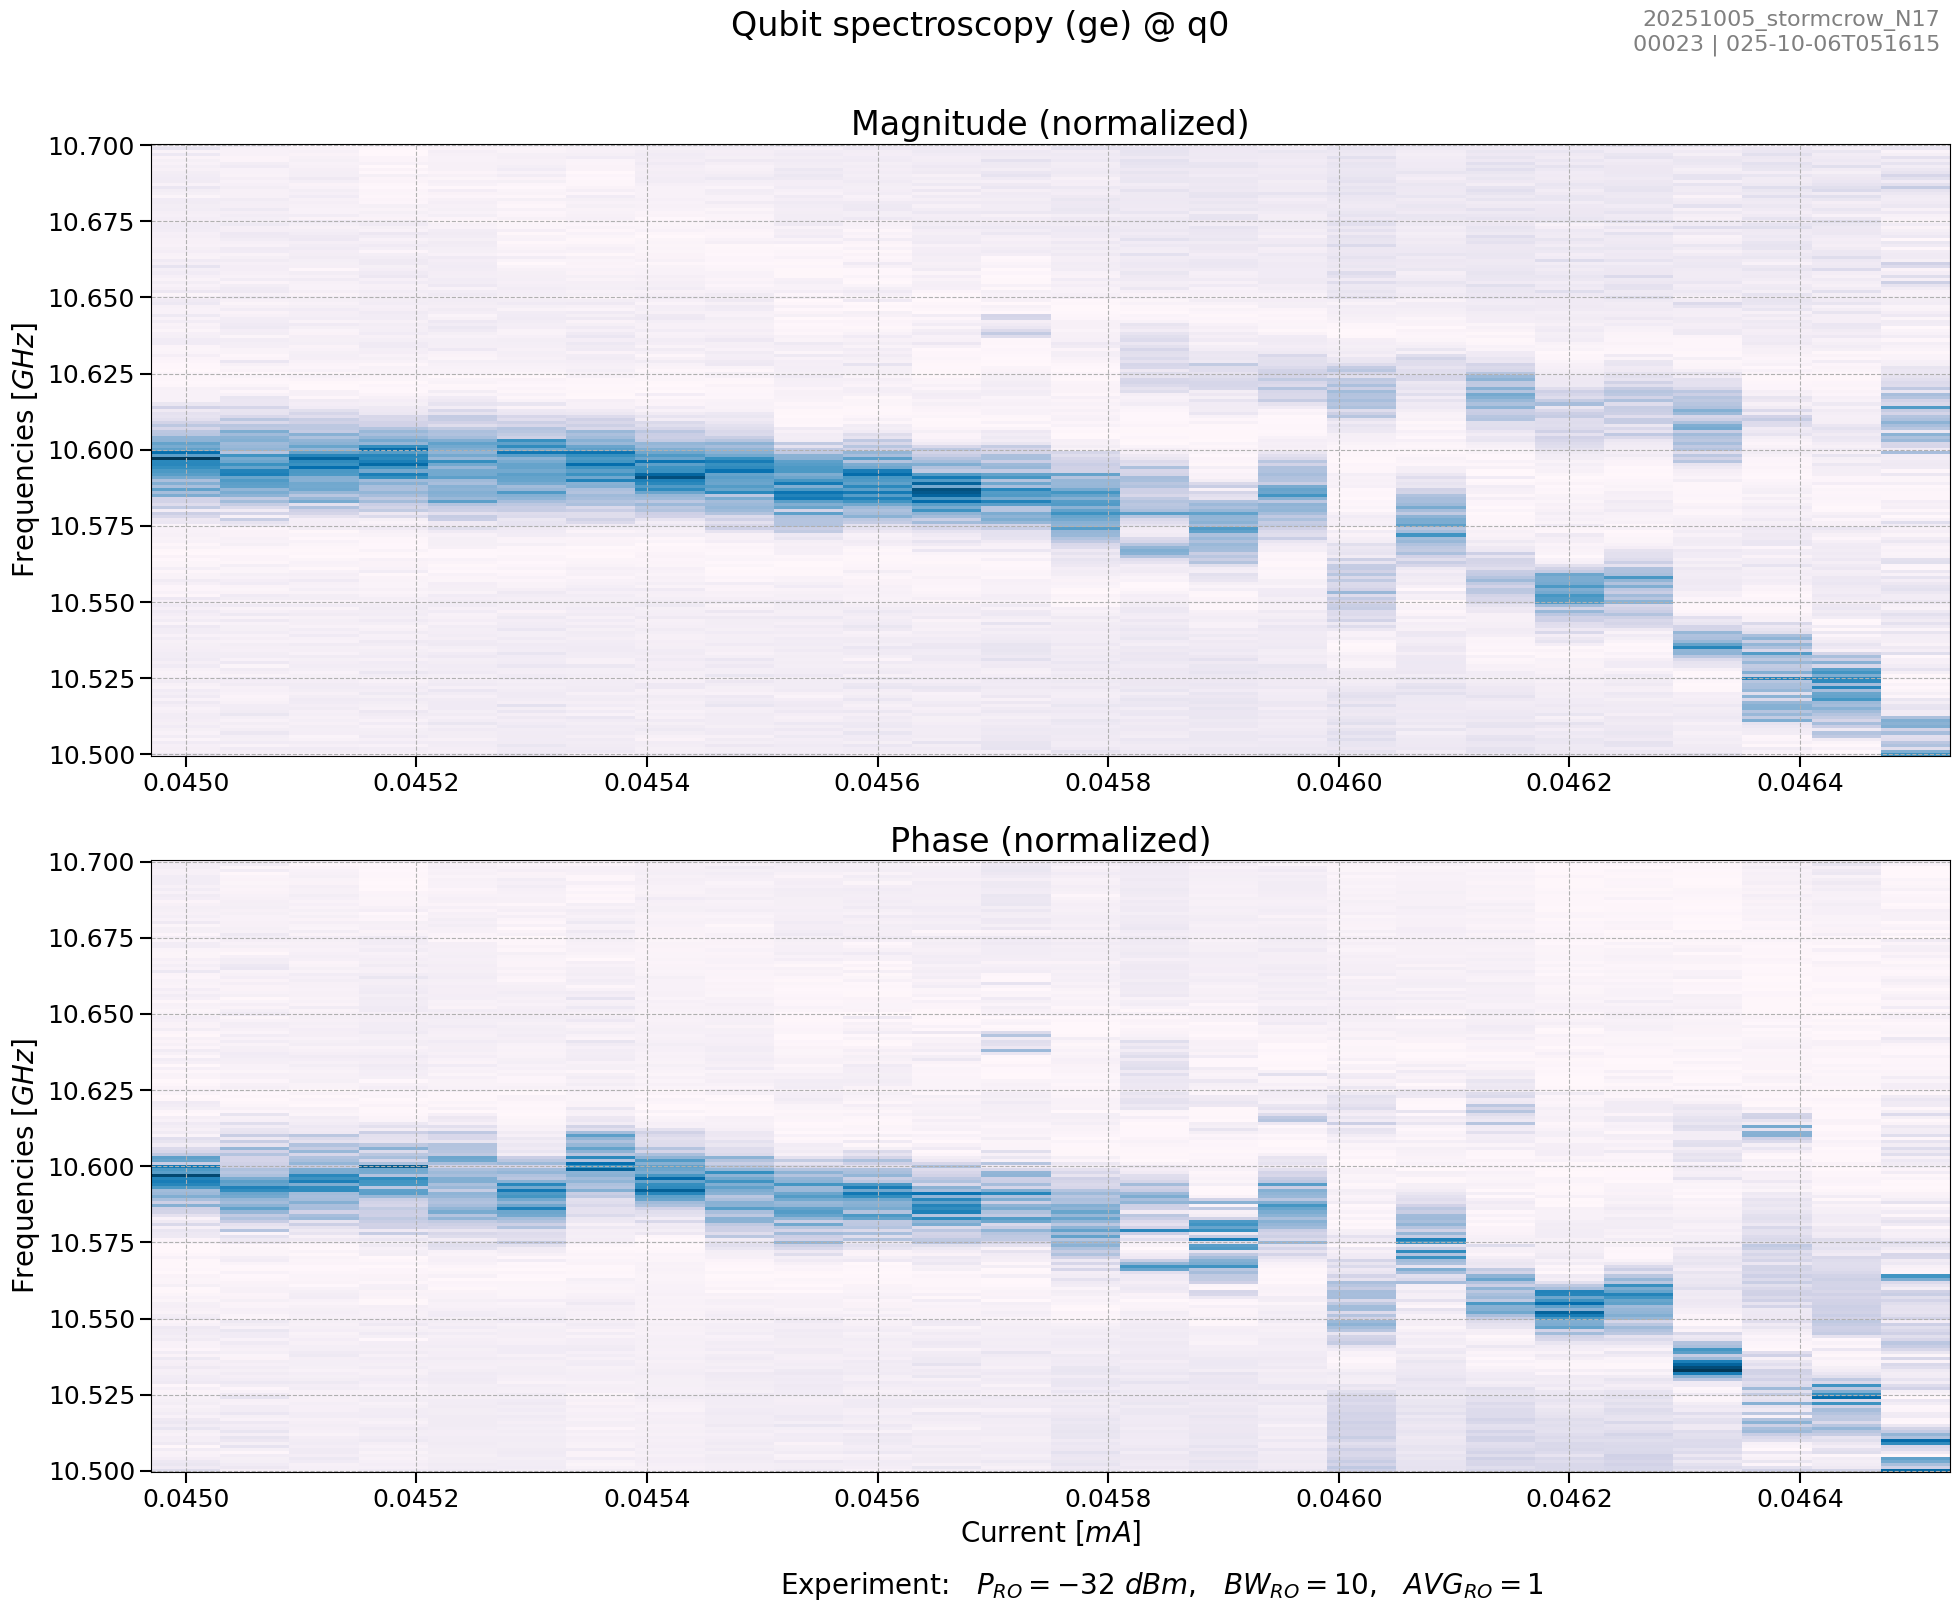

In [ ]:
import numpy as np
from cw_qu_spec import CW_QuSpec

qu_spec = CW_QuSpec()

qu_spec.qpu.quantum_elements[0].update(
    **{
        "drive_power": -3,
        "readout_acquire_bandwith": 10,
        "readout_acquire_averages": 1,
    }
)

result = qu_spec.run(
    [np.linspace(10.5e9, 10.7e9, 201)],
    sweeps={"current": np.linspace(0.045e-3, 0.0465e-3, 26)},
    qu_ids=["q0"],
    update_params=False,
)

11 left - 15 min

In [ ]:
import numpy as np
from cw_qu_spec import CW_QuSpec

qu_spec = CW_QuSpec()

qu_spec.qpu.quantum_elements[0].update(
    **{
        "drive_power": -1,
        "readout_acquire_bandwith": 50,
        "readout_acquire_averages": 1,
    }
)

result = qu_spec.run(
    [np.linspace(8.1e9, 8.5e9, 251)],
    sweeps={"current": np.linspace(0.063e-3, 0.066e-3, 26)},
    qu_ids=["q0"],
    update_params=False,
)